## **Data-Driven Real Estate: Classifying properties based on investment potential**

   
**`Data sources`**:
 
- *Zillow, Datarade, Realtor, National Association of Realtors (NAR), U.S. Census Bureau.*

**`Summary`**:


- **`Objective`**: *The primary goal of this project is to create a Machine Learning Classifier that categorizes properties based on the Return On Investment (ROI), dividing them into three categories:*  

    - *'No investment potential (NIP)',*
    - *'Moderate investment potential (MIP)',*
    - *'High investment potencial (HIP)'.*

***`ROI`**: Return on investment, or ROI, is a mathematical formula that investors can use to evaluate their investments and judge how well a particular investment has performed compared to others.*

- **`Exploratory Data Analysis (EDA)`**:
    
    - *Collect and clean data on properties, including price, location, size and amenities, from sources like Zillow and Realtor.*

    - *Analyze the distribution of property values and investment trends by region and others variables.*

    - *Explore correlations between property features and ROI to identify the key determinants of investment potential.*

    - *Visualize trends and patterns in property investment returns across different geographical areas.*

- **`Machine Learning approach`**:

    - **`Model development`**: *Use classification algorithms (e.g., decision trees, random forests, logistic regression) to build the investment potential classifier.*

    - **`Feature engineering`**: *Create new variables that capture important aspects of property investment. These features are designed to enhance the model's ability to predict ROI by better representing the factors that influence property value.*

    - **`Model evaluation`**: *Assess model performance using metrics such as accuracy, precision, recall and F1 score to ensure reliable predictions.*

- **`Potential impact`**:
    - *This project aims to assist investors in identifying lucrative properties by providing data-driven insights into the investment potential of various real estate assets.*

    - *The classifier can help real estate professionals make informed decisions on property investments, ultimately improving portfolio performance.*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import display_functions as dpf

import importlib
importlib.reload(dpf)

import warnings
warnings.filterwarnings('ignore');

### 1. Load and visualisation of the dataset

In [5]:
# Loads the DataFrame we are going to work with.
housing_us = pd.read_csv("./data/processed/real_estate_us.csv")

In [6]:
housing_us.head(10)

property_id       state        city      price  area_sqft  bedrooms  \
0            1  California   San Diego  2638547.0      667.0       NaN   
1            2      Nevada   Henderson  1093731.0      965.0       4.0   
2            3       Texas      Dallas   849545.0     3218.0       5.0   
3            4  California   San Diego  1362633.0     2298.0       NaN   
4            5       Texas     Houston   950855.0     2612.0       4.0   
5            6     Arizona      Tucson   920073.0     2470.0       2.0   
6            7  California   San Diego  1380429.0     4368.0       2.0   
7            8     Arizona  Scottsdale        NaN     4592.0       5.0   
8            9     Georgia     Atlanta  1491201.0     3091.0       4.0   
9           10    Illinois     Chicago   702736.0     4761.0       NaN   

   bathrooms  lot_size_acres  year_built  rental_income mainroad_access  \
0        3.0            0.43        1955        12880.0             Yes   
1        4.0            3.24        1973         3857.0             Yes   
2        2.0            4.59        1989         2901.0              No   
3        4.0            3.83        2001         3589.0             Yes   
4        2.0            2.93        2006         2342.0             Yes   
5        2.0            1.47        2018         4146.0              No   
6        1.0            2.04        1995         3572.0              No   
7        3.0            0.19        2005        10045.0              No   
8        3.0            3.59        1998         6160.0             Yes   
9        4.0            1.17        2004            NaN              No   

  airconditioning  garage_parking  school_rating  walkability_score  \
0              No             2.0            2.0               31.0   
1             Yes             0.0            6.0               10.0   
2              No             1.0            3.0               79.0   
3              No             0.0            NaN               28.0   
4              No             3.0            3.0               20.0   
5              No             NaN            3.0               38.0   
6             Yes             1.0            2.0               32.0   
7              No             0.0            2.0                6.0   
8              No             3.0            1.0               17.0   
9              No             3.0            5.0               36.0   

  preferred_area  tax_rate  maintenance_cost  
0             No      2.49            5711.0  
1            Yes      2.58            6194.0  
2            Yes      0.55            6045.0  
3            Yes      1.63            1001.0  
4             No      0.67            2954.0  
5            Yes      0.70            5610.0  
6             No      0.76            4594.0  
7            Yes      2.00            3312.0  
8            Yes      0.68            5579.0  
9            Yes      0.85            3418.0

In [7]:
housing_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15108 entries, 0 to 15107
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   property_id        15108 non-null  int64  
 1   state              15108 non-null  object 
 2   city               15108 non-null  object 
 3   price              14051 non-null  float64
 4   area_sqft          14051 non-null  float64
 5   bedrooms           14051 non-null  float64
 6   bathrooms          14051 non-null  float64
 7   lot_size_acres     15108 non-null  float64
 8   year_built         15108 non-null  int64  
 9   rental_income      14051 non-null  float64
 10  mainroad_access    15108 non-null  object 
 11  airconditioning    15108 non-null  object 
 12  garage_parking     14051 non-null  float64
 13  school_rating      14051 non-null  float64
 14  walkability_score  14051 non-null  float64
 15  preferred_area     15108 non-null  object 
 16  tax_rate           140

In [8]:
housing_us.describe()

property_id         price     area_sqft      bedrooms     bathrooms  \
count  15108.000000  1.405100e+04  14051.000000  14051.000000  14051.000000   
mean    7554.500000  1.035512e+06   2803.738026      2.982635      2.511850   
std     4361.448269  9.033192e+05   1267.764739      1.409620      1.117342   
min        1.000000  2.005950e+05    600.000000      1.000000      1.000000   
25%     3777.750000  4.989985e+05   1705.000000      2.000000      2.000000   
50%     7554.500000  7.352630e+05   2803.000000      3.000000      3.000000   
75%    11331.250000  1.166840e+06   3908.000000      4.000000      4.000000   
max    15108.000000  5.939204e+06   4999.000000      5.000000      4.000000   

       lot_size_acres    year_built  rental_income  garage_parking  \
count    15108.000000  15108.000000   14051.000000    14051.000000   
mean         2.535978   1985.978621    3619.710910        1.498043   
std          1.411356     20.954755    3363.408439        1.119758   
min          0.100000   1950.000000     424.000000        0.000000   
25%          1.310000   1968.000000    1646.000000        0.000000   
50%          2.540000   1986.000000    2541.000000        2.000000   
75%          3.750000   2004.000000    4176.500000        2.000000   
max          5.000000   2022.000000   28518.000000        3.000000   

       school_rating  walkability_score      tax_rate  maintenance_cost  
count   14051.000000       14051.000000  14051.000000      14051.000000  
mean        5.541670          50.370863      1.747003       4010.945627  
std         2.872478          28.822031      0.723091       1727.845419  
min         1.000000           1.000000      0.500000       1000.000000  
25%         3.000000          26.000000      1.120000       2535.500000  
50%         6.000000          50.000000      1.740000       4020.000000  
75%         8.000000          75.000000      2.380000       5494.000000  
max        10.000000         100.000000      3.000000       6999.000000

#### 1.1. Description of what each column of the dataset represents

|COLUMN|MEANING|DATA TYPE|NOTE|EXAMPLE|
|---|---|---|---|---|
|**property_id**|*Unique identifier for each property*|*Integer*|*Used only as a reference; irrelevant for modeling*||
|**state**|*The state within the United States where the property is located*|*Categorical*||*California, Texas*|
|**city**|*The specific city within the state where the property is located*|*Categorical*||*Los Angeles, Austin*|
|**price**|*Sale price of the property*|*Continuous numeric*|**`Unit`**: *US Dollars (USD)*|*$400,000, $1,200,000*|
|**area_sqft**|*The livable area of the property in square feet*|*Continuous numeric*|**`Unit`**: *Square feet (sqft)*|*2,000 sqft, 3,500 sqft*|
|**bedrooms**|*Total number of bedrooms in the property*|*Discrete numeric*||*2, 4*|
|**bathrooms**|*Total number of bathrooms in the property*|*Discrete numeric*|*Full bathrooms (including shower) count as 1, toilets without shower count 0.5*|*1, 2.5*|
|**lot_size_acres**|*The size of the lot, in acres, on which the property is built*|*Continuous numeric*|**`Unit`**: *Acres. 1 acre = 43560 sqft*|*0.25, 1.5*|
|**year_built**|*The year the property was constructed*|*Integer*||*1995, 2010*|
|**rental_income**|*Estimated monthly rental income from the property*|*Continuous numeric*|**`Unit`**: *US Dollars (USD)*|*$1,500, $3,200*|
|**mainroad_access**|*Indicates whether the property has direct access to a main road*|*Binary categorical*||*Yes, No*|
|**airconditioning**|*Indicates whether the property is equipped with an air conditioning system*|*Binary categorical*||*Yes, No*|
|**garage_parking**|*Number of parking spaces available in the garage*|*Discrete numeric*||*0, 2*|
|**school_rating**|*Average rating of nearby schools*|*Discrete numeric*|*From 1 (worst) to 10 (best)*|*5, 9*|
|**walkability_score**|*Walkability score, indicating how close essential services are*|*Discrete numeric*|*From 1 (low accessibility) to 100 (high accessibility)*|*70, 85*|
|**preferred_area**|*Indicates whether the property is located in a preferred or high-demand area*|*Binary categorical*||*Yes, No*|
|**tax_rate**|*Property tax rate*|*Continuous numeric*|**`Unit`**: *Percentage (%)*|*1.2%, 2.5%*|
|**maintenance_cost**|*Estimated annual maintenance cost of the property*|*Continuous numeric*|**`Unit`**: *US Dollars (USD)*|*$2,000, $5,000*|

In [9]:
# Remove 'property_id' column
housing_us.drop('property_id', axis = 1, inplace = True)

housing_us.head(5)

state       city      price  area_sqft  bedrooms  bathrooms  \
0  California  San Diego  2638547.0      667.0       NaN        3.0   
1      Nevada  Henderson  1093731.0      965.0       4.0        4.0   
2       Texas     Dallas   849545.0     3218.0       5.0        2.0   
3  California  San Diego  1362633.0     2298.0       NaN        4.0   
4       Texas    Houston   950855.0     2612.0       4.0        2.0   

   lot_size_acres  year_built  rental_income mainroad_access airconditioning  \
0            0.43        1955        12880.0             Yes              No   
1            3.24        1973         3857.0             Yes             Yes   
2            4.59        1989         2901.0              No              No   
3            3.83        2001         3589.0             Yes              No   
4            2.93        2006         2342.0             Yes              No   

   garage_parking  school_rating  walkability_score preferred_area  tax_rate  \
0             2.0            2.0               31.0             No      2.49   
1             0.0            6.0               10.0            Yes      2.58   
2             1.0            3.0               79.0            Yes      0.55   
3             0.0            NaN               28.0            Yes      1.63   
4             3.0            3.0               20.0             No      0.67   

   maintenance_cost  
0            5711.0  
1            6194.0  
2            6045.0  
3            1001.0  
4            2954.0

### 2. Train - Test split

*Before proceeding we should split our data in two parts: Train and Test.*

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_us, test_size = 0.2, random_state = 42)

### 3. Exploratory Data Analysis (EDA)

*This process will be performed only on the training set in order not to 'contaminate' the test data and to treat that set as purely as possible.*

#### 3.1. Univariate analysis

In [11]:
df_typification = pd.DataFrame([train_set.nunique(), train_set.nunique()/len(train_set) * 100, train_set.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

Card     %_Card     Type
state                  8   0.066192   object
city                  32   0.264769   object
price              11205  92.710574  float64
area_sqft           4060  33.592586  float64
bedrooms               5    0.04137  float64
bathrooms              4   0.033096  float64
lot_size_acres       491   4.062552  float64
year_built            73   0.604005    int64
rental_income       5435  44.969386  float64
mainroad_access        2   0.016548   object
airconditioning        2   0.016548   object
garage_parking         4   0.033096  float64
school_rating         10    0.08274  float64
walkability_score    100   0.827404  float64
preferred_area         2   0.016548   object
tax_rate             251   2.076783  float64
maintenance_cost    5053  41.808704  float64

In [12]:
cat_cols = [
    'state',
    'city',
    'mainroad_access',
    'airconditioning',
    'preferred_area'
]

num_cols = [
    'price',
    'area_sqft',
    'bedrooms',
    'bathrooms',
    'lot_size_acres',
    'year_built',
    'rental_income',
    'garage_parking',
    'school_rating',
    'walkability_score',
    'tax_rate',
    'maintenance_cost'
]

train_set[cat_cols].mode().T # Get the most common type of property.

0
state                Nevada
city             Scottsdale
mainroad_access          No
airconditioning         Yes
preferred_area          Yes

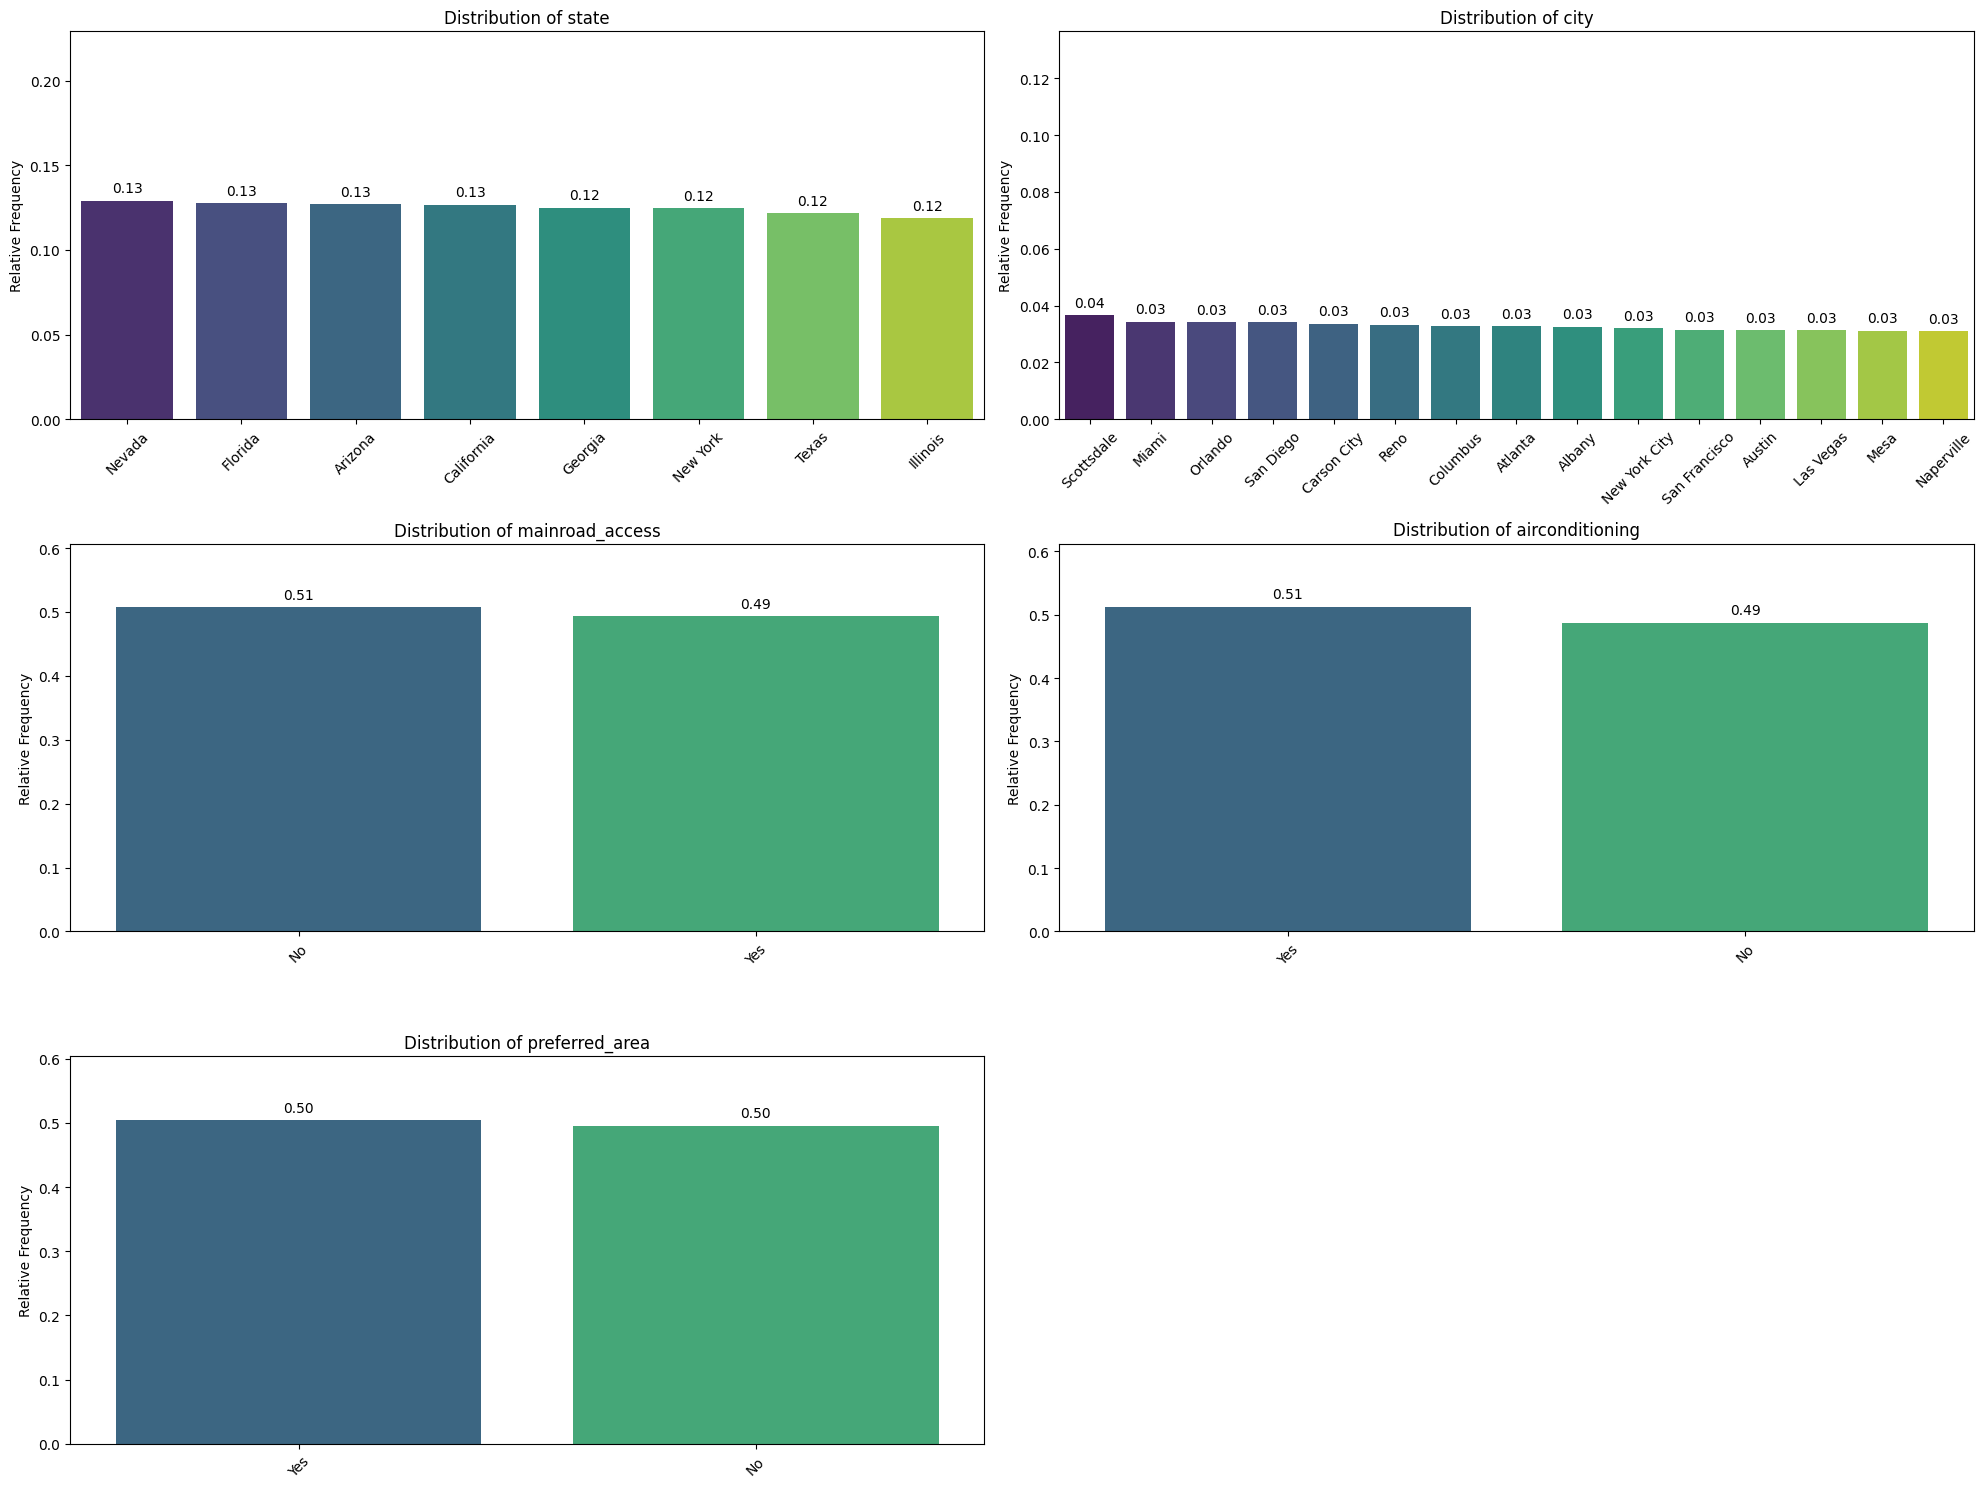

In [13]:
dpf.plot_categorical_distribution(train_set, cat_cols, relative = True, show_values = True, limit = 15)

*It seems to be quite balanced in terms of category features.*

(12, 2)


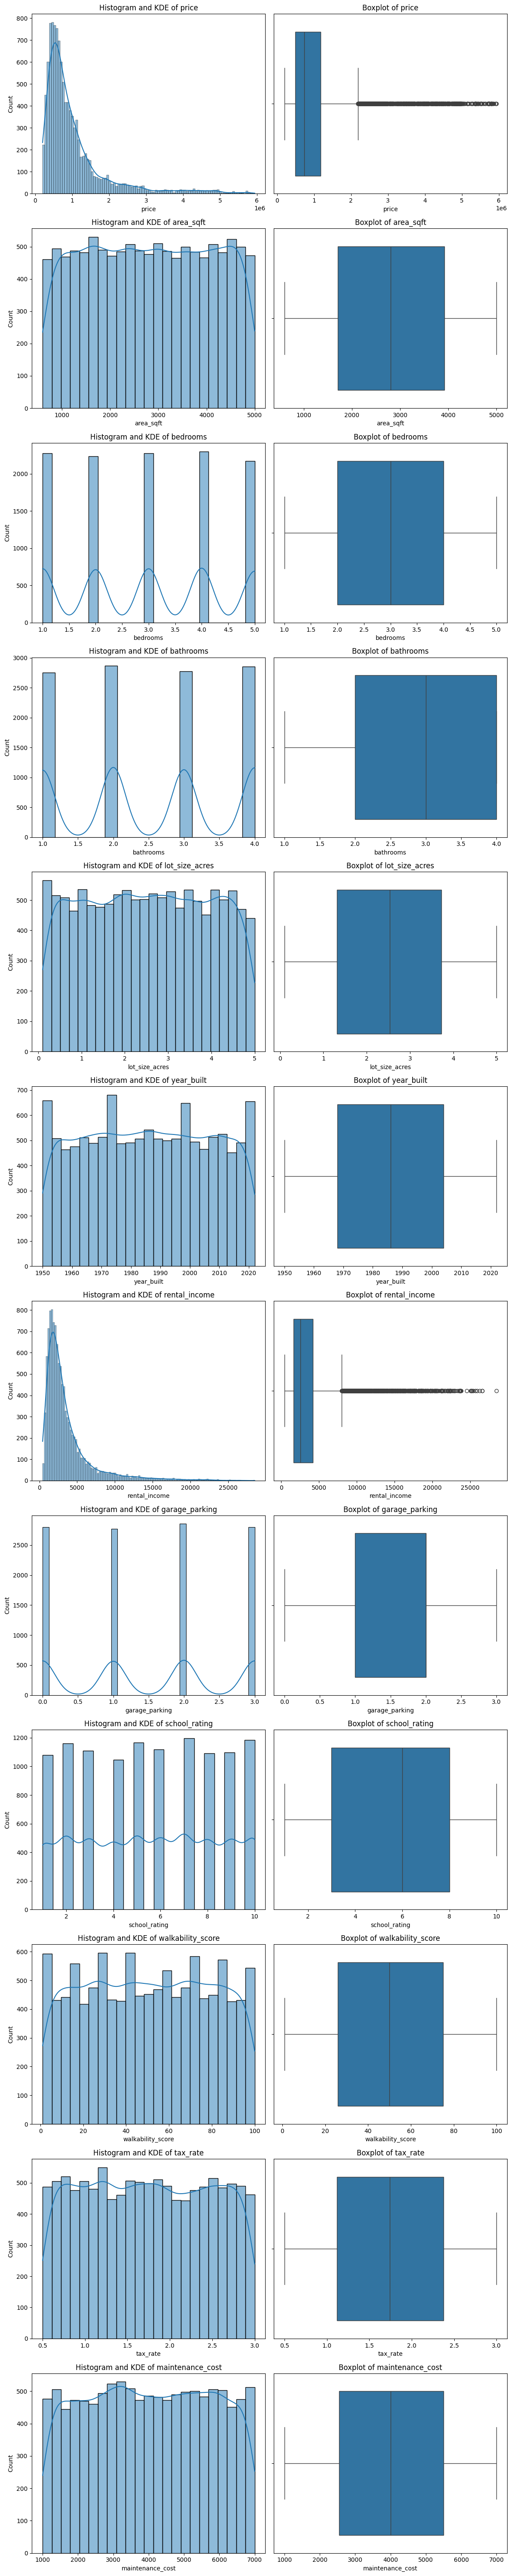

In [14]:
dpf.plot_combined_graphs(train_set, num_cols)

- **`Property price`**: *Shows a distribution skewed to the right, where most properties have low prices, but there are some significantly more expensive properties (outliers). Strong presence of outliers at the top of the price range.*   

- **`Rental income`**: *Shows a skewed distribution to the right, similar to that of prices, with most values concentrated in low income and some outliers. Presence of outliers at the high end, representing properties with unusually high rental income.*

- **`Maintenance cost`**: *Indicates an approximately uniform distribution, suggesting that maintenance costs are relatively evenly distributed among the available values. No significant outliers are present.* 

#### 4.2. Bivariate analysis

In [15]:
features_pairplot = ['price', 'area_sqft', 'lot_size_acres', 'year_built', 'rental_income', 'tax_rate', 'maintenance_cost']

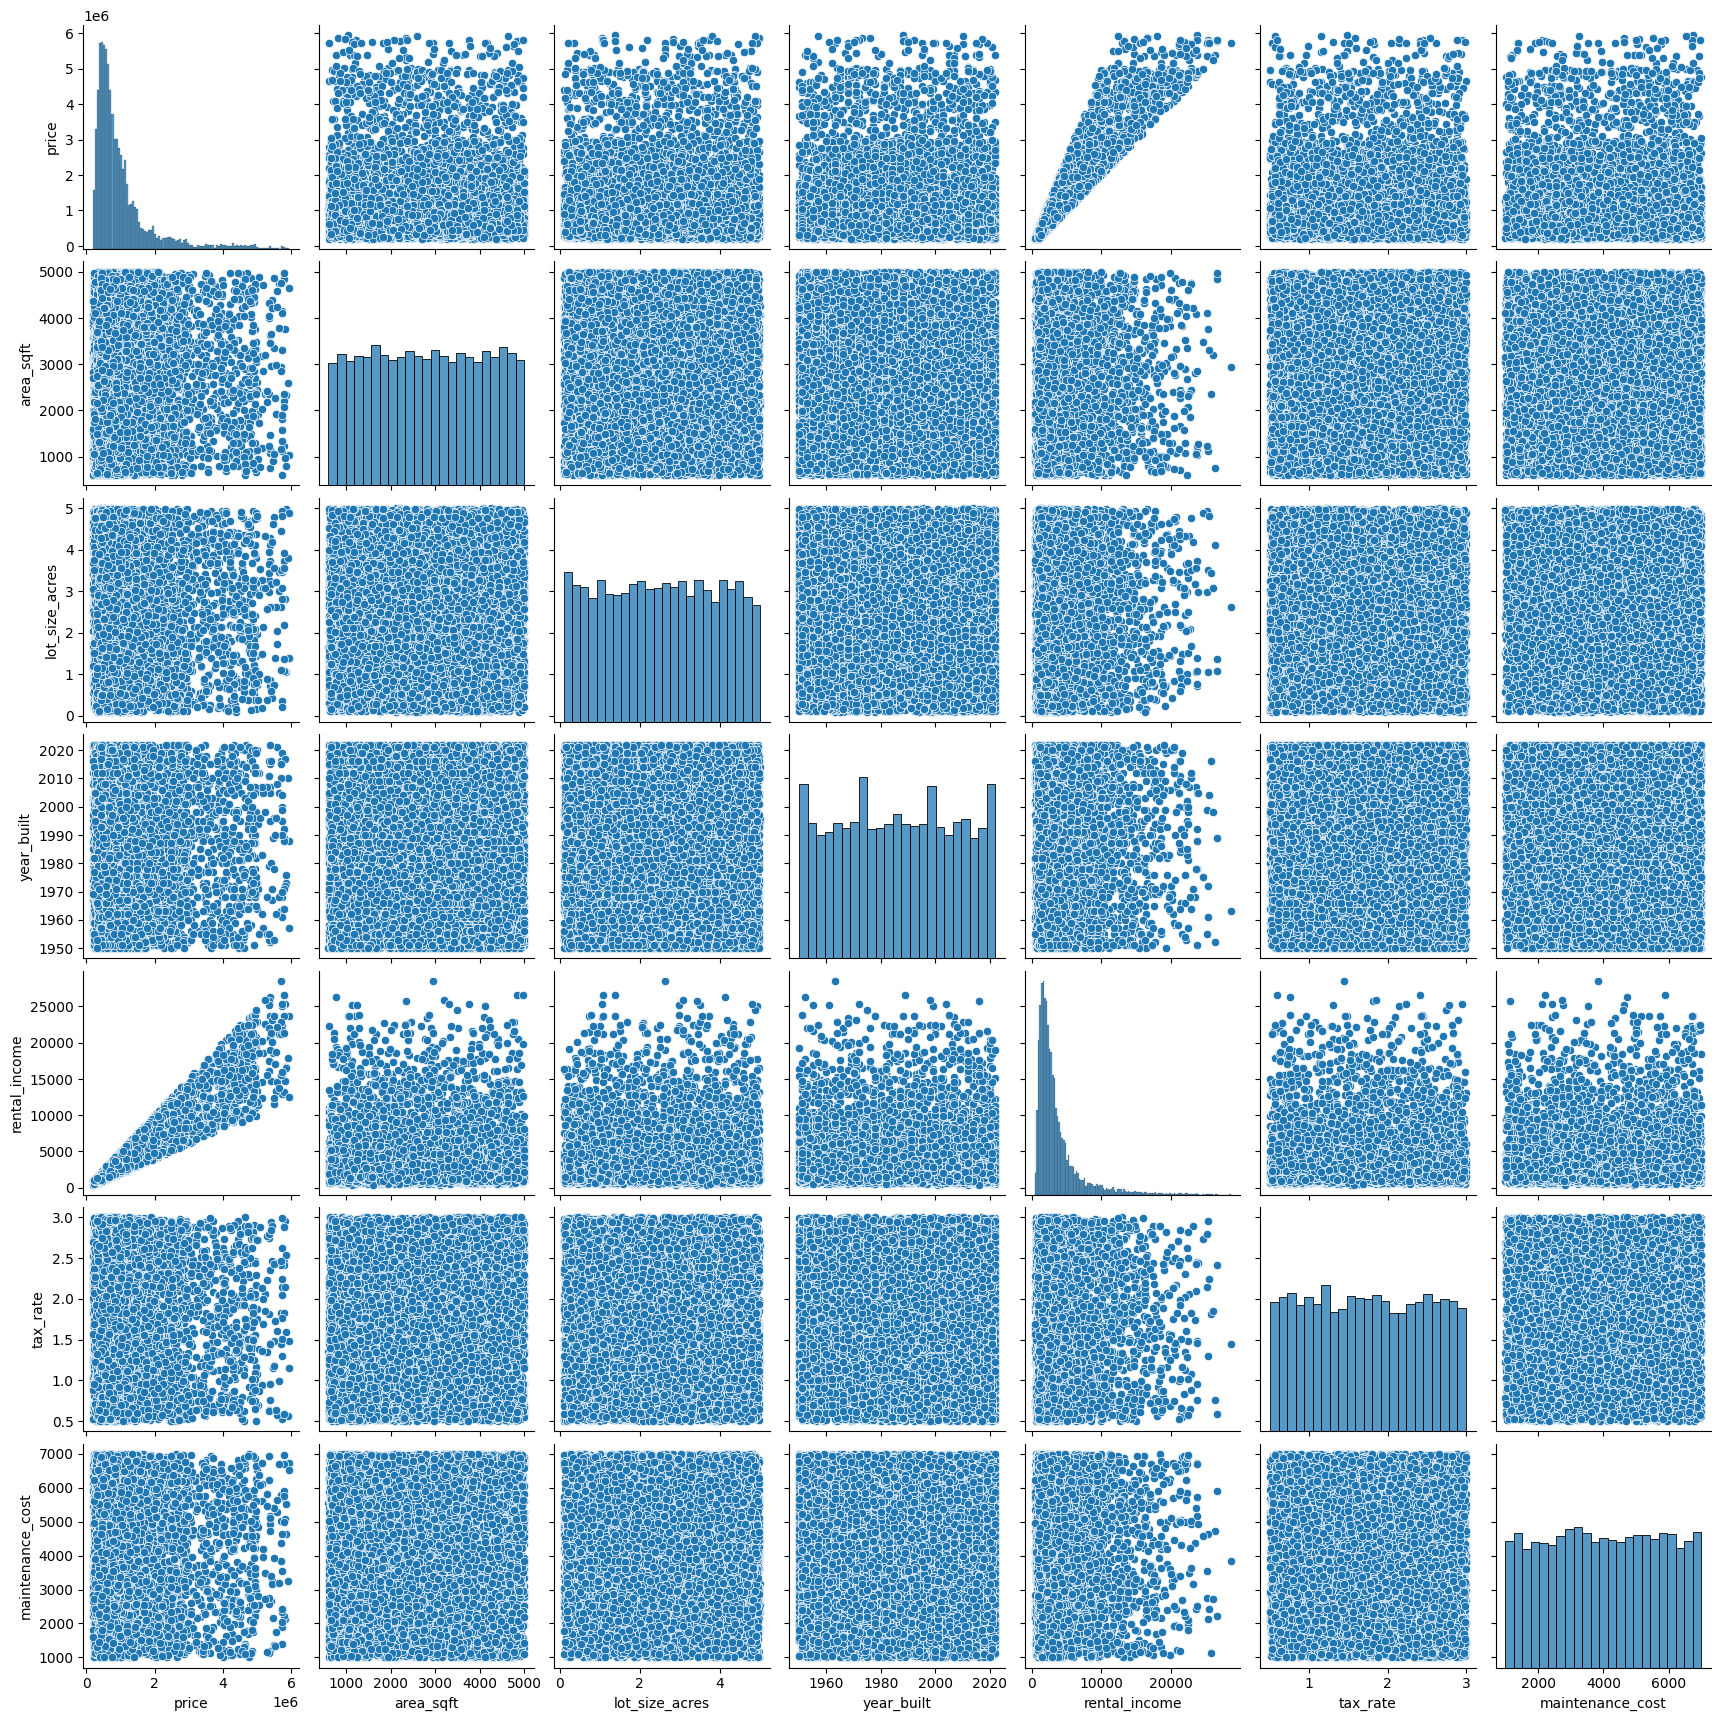

In [16]:
sns.pairplot(train_set[features_pairplot])

- **Price - Rental income**: *It is observed that properties with higher prices tend to generate higher rental income, although the degree of dispersion is considerable. Some higher priced properties do not generate as high rental income.*

*Let's do a bivariate analysis basing it in the column 'price'.*

In [17]:
corr = train_set.corr(numeric_only = True)
np.abs(corr['price']).sort_values(ascending = False)

price                1.000000
rental_income        0.937304
year_built           0.018721
garage_parking       0.012007
walkability_score    0.010907
area_sqft            0.007182
tax_rate             0.004985
bedrooms             0.004739
lot_size_acres       0.004582
bathrooms            0.004100
maintenance_cost     0.003684
school_rating        0.001792
Name: price, dtype: float64

<Axes: >

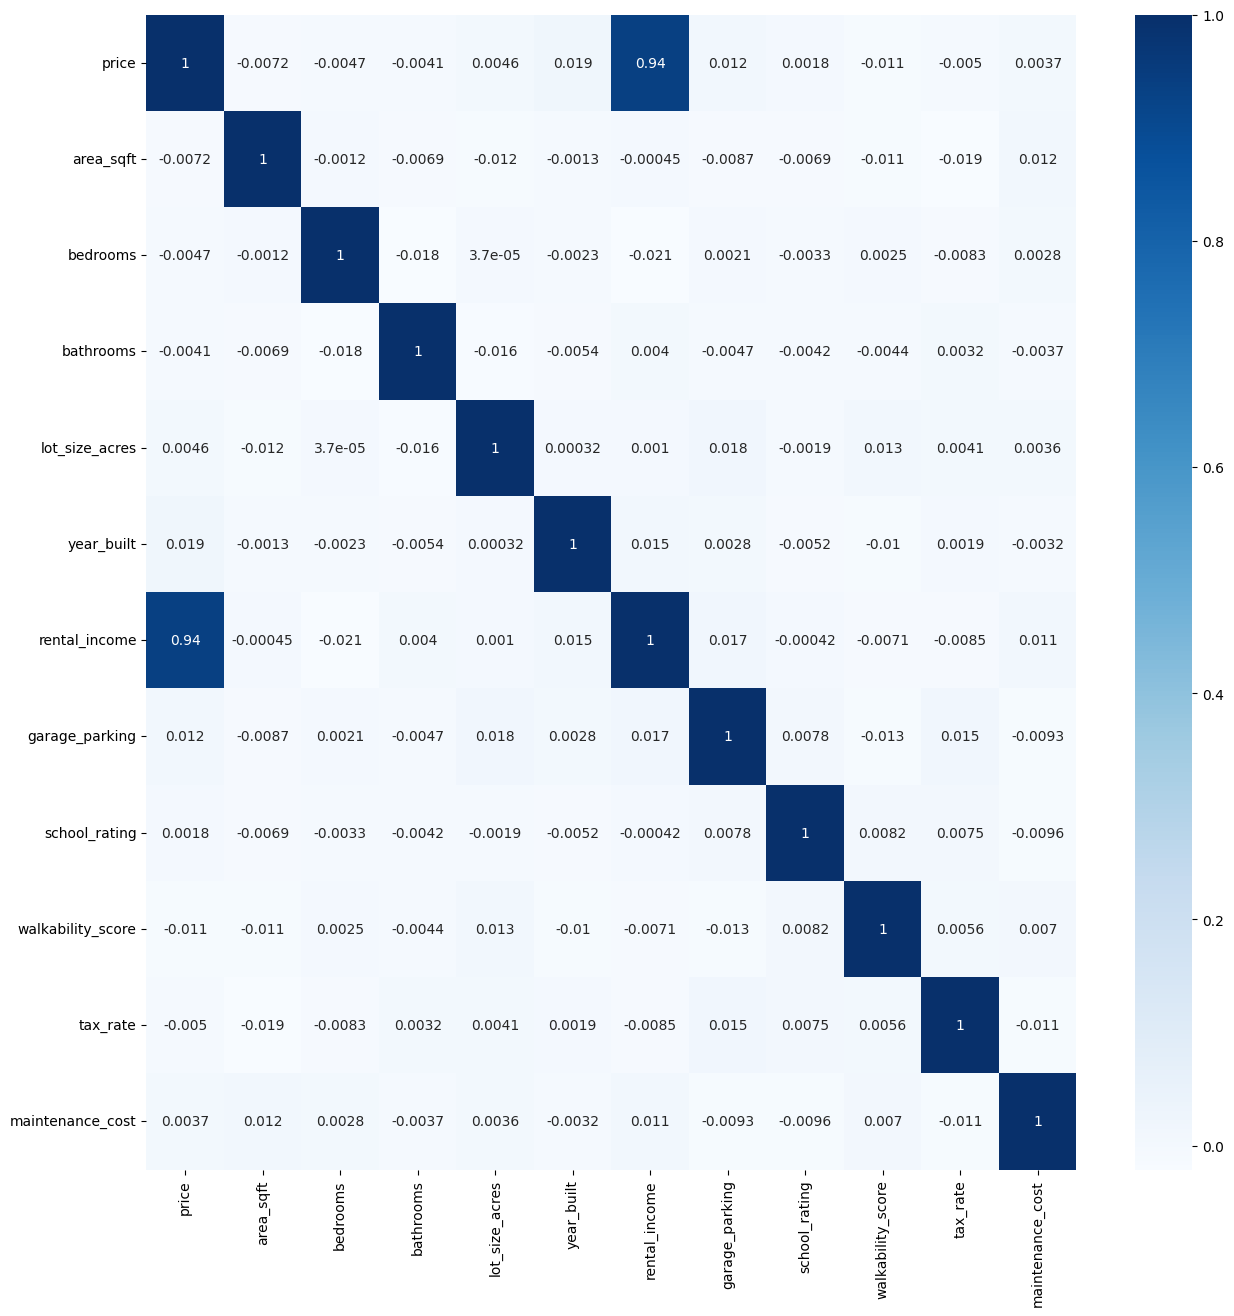

In [18]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = "Blues")

*It seems that doing the EDA without the target column does not give us much information, so let's stop here and when we create it we will resume this step.*

### 4. Imputation of null values

In [19]:
# Verify if any missing values remain
train_set.isnull().sum()

state                  0
city                   0
price                854
area_sqft            848
bedrooms             827
bathrooms            844
lot_size_acres         0
year_built             0
rental_income        852
mainroad_access        0
airconditioning        0
garage_parking       853
school_rating        833
walkability_score    849
preferred_area         0
tax_rate             843
maintenance_cost     872
dtype: int64

*Although we do not have missing in all columns, we will adjust all of them in case in the future we get new data with missing values in other columns, the model has to be predictive and trained for this.*

In [20]:
# Imputation of missing values

# Step 1: Impute 'state' based on city
mode_state_train = train_set.groupby("city")["state"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_state_test = test_set.groupby("city")["state"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

train_set["state"].fillna(train_set["city"].map(mode_state_train), inplace = True)
test_set["state"].fillna(test_set["city"].map(mode_state_test), inplace = True)


# Step 2: Impute 'city' based on state
mode_city_train = train_set.groupby("state")["city"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_city_test = test_set.groupby("state")["city"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

train_set["city"].fillna(train_set["state"].map(mode_city_train), inplace = True)
test_set["city"].fillna(test_set["state"].map(mode_city_test), inplace = True)


# Step 3: Impute 'price' based on state, city and bedrooms
median_price_train = train_set.groupby(["state", "city", "bedrooms"])["price"].transform("median")
median_price_test = test_set.groupby(["state", "city", "bedrooms"])["price"].transform("median")

train_set["price"] = train_set.apply(
    lambda row: row["price"] if not pd.isnull(row["price"]) else median_price_train[row.name],
    axis = 1)

test_set["price"] = test_set.apply(
    lambda row: row["price"] if not pd.isnull(row["price"]) else median_price_test[row.name],
    axis = 1)


# Step 4: Impute 'area_sqft' based on bedrooms and bathrooms
median_area_train = train_set.groupby(["bedrooms", "bathrooms"])["area_sqft"].transform("median")
median_area_test = test_set.groupby(["bedrooms", "bathrooms"])["area_sqft"].transform("median")

train_set["area_sqft"] = train_set.apply(
    lambda row: row["area_sqft"] if not pd.isnull(row["area_sqft"]) else median_area_train[row.name],
    axis = 1)

test_set["area_sqft"] = test_set.apply(
    lambda row: row["area_sqft"] if not pd.isnull(row["area_sqft"]) else median_area_test[row.name],
    axis = 1)


# Step 5: Impute 'bedrooms' based on area_sqft and city
median_bedrooms_train = train_set.groupby(["city", "area_sqft"])["bedrooms"].transform("median")
median_bedrooms_test = test_set.groupby(["city", "area_sqft"])["bedrooms"].transform("median")

train_set["bedrooms"] = train_set.apply(
    lambda row: row["bedrooms"] if not pd.isnull(row["bedrooms"]) else median_bedrooms_train[row.name],
    axis = 1)

test_set["bedrooms"] = test_set.apply(
    lambda row: row["bedrooms"] if not pd.isnull(row["bedrooms"]) else median_bedrooms_test[row.name],
    axis = 1)


# Step 6: Impute 'bathrooms' based on bedrooms and area_sqft
median_bathrooms_train = train_set.groupby(["bedrooms", "area_sqft"])["bathrooms"].transform("median")
median_bathrooms_test = test_set.groupby(["bedrooms", "area_sqft"])["bathrooms"].transform("median")

train_set["bathrooms"] = train_set.apply(
    lambda row: row["bathrooms"] if not pd.isnull(row["bathrooms"]) else median_bathrooms_train.get((row["bedrooms"], row["area_sqft"]), None),
    axis = 1)

test_set["bathrooms"] = test_set.apply(
    lambda row: row["bathrooms"] if not pd.isnull(row["bathrooms"]) else median_bathrooms_test.get((row["bedrooms"], row["area_sqft"]), None),
    axis = 1)


# Step 7: Impute 'lot_size_acres' based on state and city
median_lot_size_train = train_set.groupby(["state", "city"])["lot_size_acres"].transform("median")
median_lot_size_test = test_set.groupby(["state", "city"])["lot_size_acres"].transform("median")

train_set["lot_size_acres"] = train_set.apply(
    lambda row: row["lot_size_acres"] if not pd.isnull(row["lot_size_acres"]) else median_lot_size_train[row.name],
    axis=1)

test_set["lot_size_acres"] = test_set.apply(
    lambda row: row["lot_size_acres"] if not pd.isnull(row["lot_size_acres"]) else median_lot_size_test[row.name],
    axis=1)


# Step 8: Impute 'year_built' based on state, city, and bedrooms
mode_year_built_train = train_set.groupby(["state", "city", "bedrooms"])["year_built"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_year_built_test = test_set.groupby(["state", "city", "bedrooms"])["year_built"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

train_set["year_built"] = train_set.apply(
    lambda row: row["year_built"] if not pd.isnull(row["year_built"]) else mode_year_built_train.get((row["state"], row["city"], row["bedrooms"]), None),
    axis = 1)

test_set["year_built"] = test_set.apply(
    lambda row: row["year_built"] if not pd.isnull(row["year_built"]) else mode_year_built_test.get((row["state"], row["city"], row["bedrooms"]), None),
    axis = 1)


# Step 9: Impute 'rental_income' based on price and location (state and city)
median_rental_income_train = train_set.groupby(["state", "city"]).apply(
    lambda group: (group["rental_income"] / group["price"]).median())
median_rental_income_test = test_set.groupby(["state", "city"]).apply(
    lambda group: (group["rental_income"] / group["price"]).median())


train_set["rental_income"] = train_set.apply(
    lambda row: row["rental_income"] if not pd.isnull(row["rental_income"]) else row["price"] * median_rental_income_train[row["state"], row["city"]],
    axis = 1)

test_set["rental_income"] = test_set.apply(
    lambda row: row["rental_income"] if not pd.isnull(row["rental_income"]) else row["price"] * median_rental_income_test[row["state"], row["city"]],
    axis = 1)


# Step 10: Impute 'mainroad_access' based on city and preferred_area
mode_mainroad_access_train = train_set.groupby(["city", "preferred_area"])["mainroad_access"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_mainroad_access_test = test_set.groupby(["city", "preferred_area"])["mainroad_access"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

train_set["mainroad_access"] = train_set.apply(
    lambda row: row["mainroad_access"] if not pd.isnull(row["mainroad_access"]) else mode_mainroad_access_train.get((row["city"], row["preferred_area"]), None),
    axis = 1)

test_set["mainroad_access"] = test_set.apply(
    lambda row: row["mainroad_access"] if not pd.isnull(row["mainroad_access"]) else mode_mainroad_access_test.get((row["city"], row["preferred_area"]), None),
    axis = 1)


# Step 11: Impute 'airconditioning' based on city and preferred_area
mode_airconditioning_train = train_set.groupby(["city", "preferred_area"])["airconditioning"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_airconditioning_test = test_set.groupby(["city", "preferred_area"])["airconditioning"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

train_set["airconditioning"] = train_set.apply(
    lambda row: row["airconditioning"] if not pd.isnull(row["airconditioning"]) else mode_airconditioning_train.get((row["city"], row["preferred_area"]), None),
    axis = 1)

test_set["airconditioning"] = test_set.apply(
    lambda row: row["airconditioning"] if not pd.isnull(row["airconditioning"]) else mode_airconditioning_test.get((row["city"], row["preferred_area"]), None),
    axis = 1)


# Step 12: Impute 'garage_parking' based on city and bedrooms
median_garage_train = train_set.groupby(["city", "bedrooms"])["garage_parking"].transform("median")
median_garage_test = test_set.groupby(["city", "bedrooms"])["garage_parking"].transform("median")


train_set["garage_parking"] = train_set.apply(
    lambda row: row["garage_parking"] if not pd.isnull(row["garage_parking"]) else median_garage_train[row.name],
    axis = 1)

test_set["garage_parking"] = test_set.apply(
    lambda row: row["garage_parking"] if not pd.isnull(row["garage_parking"]) else median_garage_test[row.name],
    axis = 1)


# Step 13: Impute 'school_rating' based on state and city
median_school_rating_train = train_set.groupby(["state", "city"])["school_rating"].transform("median")
median_school_rating_test = test_set.groupby(["state", "city"])["school_rating"].transform("median")

train_set["school_rating"] = train_set.apply(
    lambda row: row["school_rating"] if not pd.isnull(row["school_rating"]) else median_school_rating_train[row.name],
    axis = 1)

test_set["school_rating"] = test_set.apply(
    lambda row: row["school_rating"] if not pd.isnull(row["school_rating"]) else median_school_rating_test[row.name],
    axis = 1)


# Step 14: Impute 'walkability_score' based on state, city, and preferred_area
median_walkability_train = train_set.groupby(["state", "city", "preferred_area"])["walkability_score"].transform("median")
median_walkability_test = test_set.groupby(["state", "city", "preferred_area"])["walkability_score"].transform("median")

train_set["walkability_score"] = train_set.apply(
    lambda row: row["walkability_score"] if not pd.isnull(row["walkability_score"]) else median_walkability_train[row.name],
    axis = 1)

test_set["walkability_score"] = test_set.apply(
    lambda row: row["walkability_score"] if not pd.isnull(row["walkability_score"]) else median_walkability_test[row.name],
    axis = 1)


# Step 15: Impute 'preferred_area' based on price and city
mode_preferred_area_train = train_set.groupby(["price", "city"])["preferred_area"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_preferred_area_test = test_set.groupby(["price", "city"])["preferred_area"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

train_set["preferred_area"] = train_set.apply(
    lambda row: row["preferred_area"] if not pd.isnull(row["preferred_area"]) else mode_preferred_area_train.get((row["price"], row["city"]), None),
    axis = 1)

test_set["preferred_area"] = test_set.apply(
    lambda row: row["preferred_area"] if not pd.isnull(row["preferred_area"]) else mode_preferred_area_test.get((row["price"], row["city"]), None),
    axis = 1)


# Step 16: Impute 'tax_rate' based on state
median_tax_rate_train = train_set.groupby("state")["tax_rate"].transform("median")
median_tax_rate_test = test_set.groupby("state")["tax_rate"].transform("median")

train_set["tax_rate"] = train_set.apply(
    lambda row: row["tax_rate"] if not pd.isnull(row["tax_rate"]) else median_tax_rate_train[row.name],
    axis = 1)

test_set["tax_rate"] = test_set.apply(
    lambda row: row["tax_rate"] if not pd.isnull(row["tax_rate"]) else median_tax_rate_test[row.name],
    axis = 1)


# Step 17: Impute 'maintenance_cost' based on price and area_sqft
train_set["maintenance_cost"] = train_set.apply(
    lambda row: row["maintenance_cost"] if not pd.isnull(row["maintenance_cost"]) else (row["price"] * 0.005) + (row["area_sqft"] * 0.1),
    axis = 1)

test_set["maintenance_cost"] = test_set.apply(
    lambda row: row["maintenance_cost"] if not pd.isnull(row["maintenance_cost"]) else (row["price"] * 0.005) + (row["area_sqft"] * 0.1),
    axis = 1)

# Verify if any missing values remain
train_set.isnull().sum()

state                  0
city                   0
price                 59
area_sqft            123
bedrooms             770
bathrooms            844
lot_size_acres         0
year_built             0
rental_income          8
mainroad_access        0
airconditioning        0
garage_parking        56
school_rating          0
walkability_score      0
preferred_area         0
tax_rate               0
maintenance_cost      11
dtype: int64

*The values 0.005 and 0.1 in the formula are constant factors used to calculate the cost of maintenance based on two specific variables: the price of the property (price) and its area in square feet (area_sqft). These factors multiply the variables to assign a proportional cost.*

- **`0.005 (5‰)`**: *Multiplies the price (price) to determine what fraction of the total price is allocated as maintenance cost. Indicates that maintenance is related to the monetary value of the property.*

- **`0.1 (10%)`**: *Multiplies the area (area_sqft) to add a cost that depends directly on the physical size of the property. Reflects that larger properties have greater maintenance needs.*

*In this formula, the values are default constants, used as a way to impute missing data in the maintenance_cost column. These coefficients are not dynamically calculated in the code; they are explicitly defined as part of the logic for estimating maintenance cost.*

In [21]:
# Impute remaining missing values with global medians

columns_to_impute_median = ["price", "area_sqft", "bedrooms", "bathrooms", "lot_size_acres", "rental_income", "garage_parking", "maintenance_cost", "school_rating", "walkability_score", "tax_rate", "maintenance_cost"]
for col in columns_to_impute_median:
    train_set[col].fillna(train_set[col].median(), inplace = True)
    test_set[col].fillna(test_set[col].median(), inplace = True)

columns_to_impute_mode = ["state", "city", "year_built", "mainroad_access", "airconditioning", "preferred_area"]
for col in columns_to_impute_mode:
    train_set[col].fillna(train_set[col].mode(), inplace = True)
    test_set[col].fillna(test_set[col].mode(), inplace = True)

# Verify if any missing values remain
train_set.isnull().sum()

state                0
city                 0
price                0
area_sqft            0
bedrooms             0
bathrooms            0
lot_size_acres       0
year_built           0
rental_income        0
mainroad_access      0
airconditioning      0
garage_parking       0
school_rating        0
walkability_score    0
preferred_area       0
tax_rate             0
maintenance_cost     0
dtype: int64

### 5. Create new columns

##### **Understanding ROI and Its Role in the Project**
**`What is ROI?`**

- **ROI** *stands for **Return on Investment**. It is a metric used to evaluate the profitability of an investment relative to its cost.*   

- *In real estate, ROI is used to determine how profitable a property is based on factors like purchase price, rental income, maintenance costs, and property taxes.*

*The formula for calculating ROI is:*

$$
ROI = \frac{(Rental\ Income \times 12) - Maintenance\ Cost - (Price \times \frac{Tax\ Rate}{100})}{Price} \times 100
$$
​
*Where:*

- *`Rental Income` is the monthly income generated from renting the property.*
- *`Maintenance Cost` is the annual cost of maintaining the property.*
- *`Price` is the purchase price of the property.*
- *`Tax Rate` is the annual property tax rate as a percentage.*

**Why create a ROI column?**

*The ROI column serves as a bridge to our target variable, which classifies properties into categories based on their profitability:*

- *Not profitable (`ROI < 0%`).*
- *Somewhat profitable (`0% ≤ ROI < 4%`).*
- *Highly profitable (`ROI ≥ 4%`).*

**Target Column**

*The target column will be named `profitability_category` and will classify properties into these three profitability categories.*

**Implementation**

*Let's calculate the `ROI` column using the formula and then categorize the properties into the `profitability_category`.*

In [22]:
# Calculate the ROI column
train_set["ROI"] = (
    (train_set["rental_income"] * 12 - train_set["maintenance_cost"] - (train_set["price"] * train_set["tax_rate"] / 100))
    / train_set["price"]) * 100

test_set["ROI"] = (
    (test_set["rental_income"] * 12 - test_set["maintenance_cost"] - (test_set["price"] * test_set["tax_rate"] / 100))
    / test_set["price"]) * 100

# Define profitability categories
def categorize_profitability(roi):
    if roi < 0:
        return "Not profitable"
    elif 0 <= roi < 4:
        return "Somewhat profitable"
    else:
        return "Highly profitable"

# Create the profitability_category column
train_set["profitability_category"] = train_set["ROI"].apply(categorize_profitability)
test_set["profitability_category"] = test_set["ROI"].apply(categorize_profitability)

# Display sample data
train_set[["ROI", "profitability_category"]].head()

ROI profitability_category
668   -0.371121         Not profitable
13149  4.208066      Highly profitable
12508  4.283071      Highly profitable
4015  -0.012390         Not profitable
14185  2.451790    Somewhat profitable

#### * Return to EDA

##### - Univariate analysis

In [23]:
num_cols.append(['ROI'])
cat_cols.append(['profitability_category'])

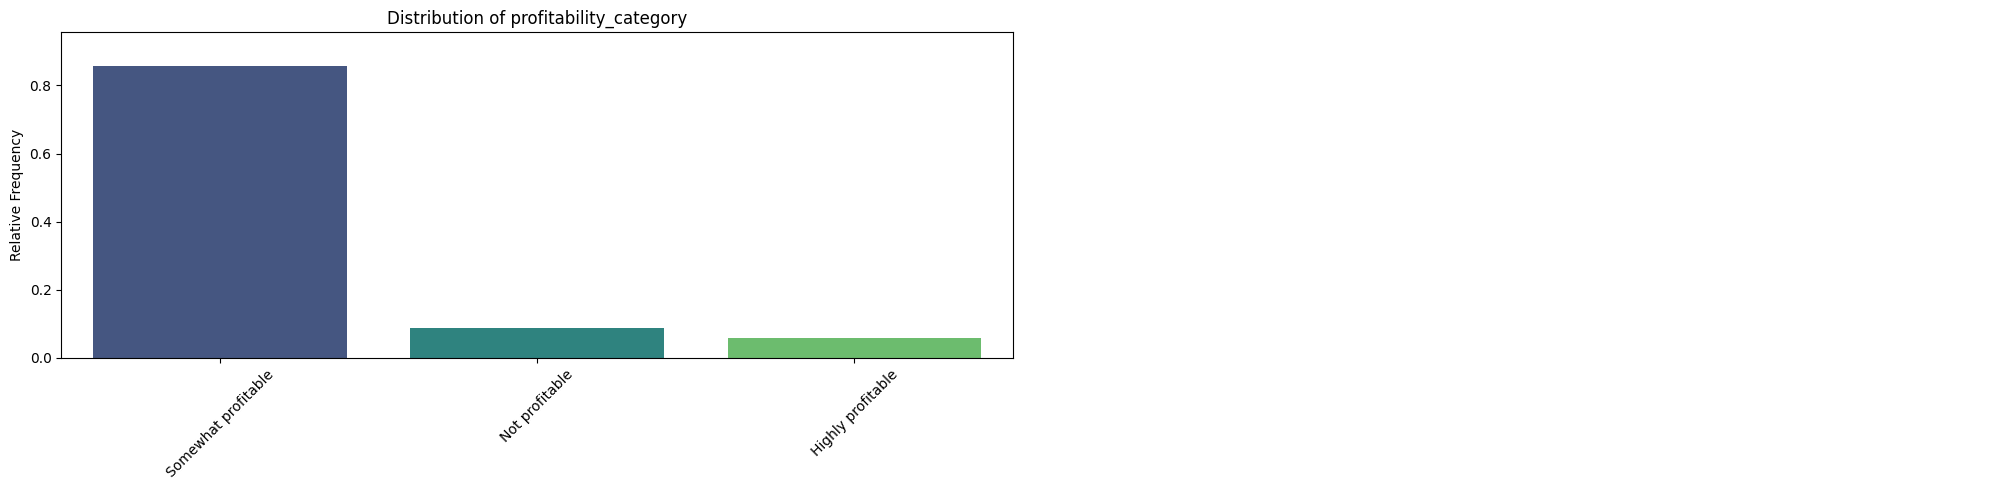

In [24]:
dpf.plot_categorical_distribution(train_set, ['profitability_category'], relative = True)

*In view of this, something will have to be done to equalize the amounts of data for each level of profitability in order for the model to work correctly.*

In [25]:
train_set.ROI.describe().round(2)

count    12086.00
mean         1.87
std          1.37
min         -2.62
25%          0.91
50%          1.85
75%          2.82
max         12.10
Name: ROI, dtype: float64

(2,)


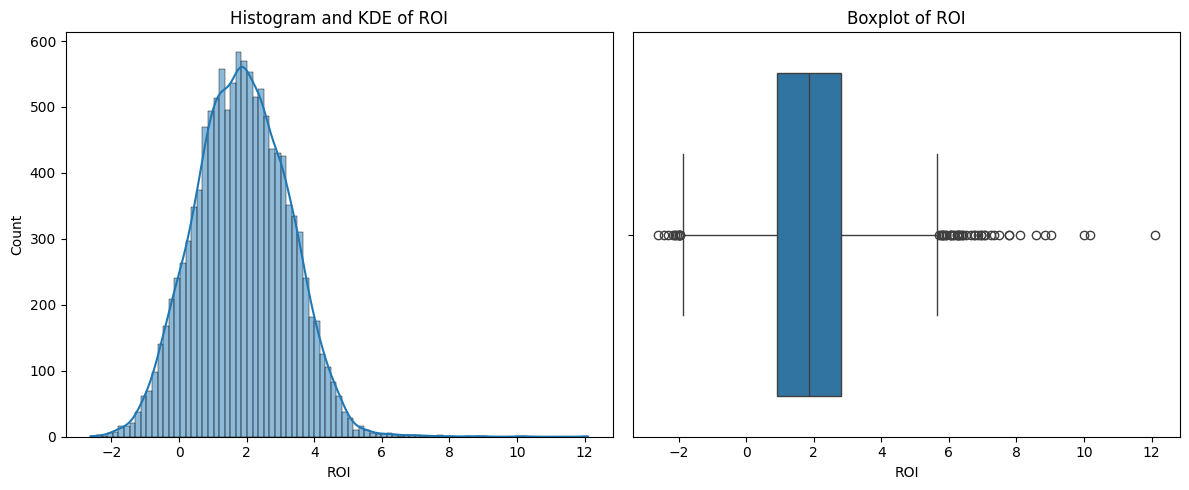

In [26]:
dpf.plot_combined_graphs(train_set, ['ROI'])

- **`ROI (Return of Investment)`**: *Shows an approximately normal distribution of the ROI, with a peak around value 2 and a slight positive skewness. Most of the ROI values are concentrated between approximately 1 and 3, with some outliers to the left (negative or close to zero values).*

##### - Bivariate analysis

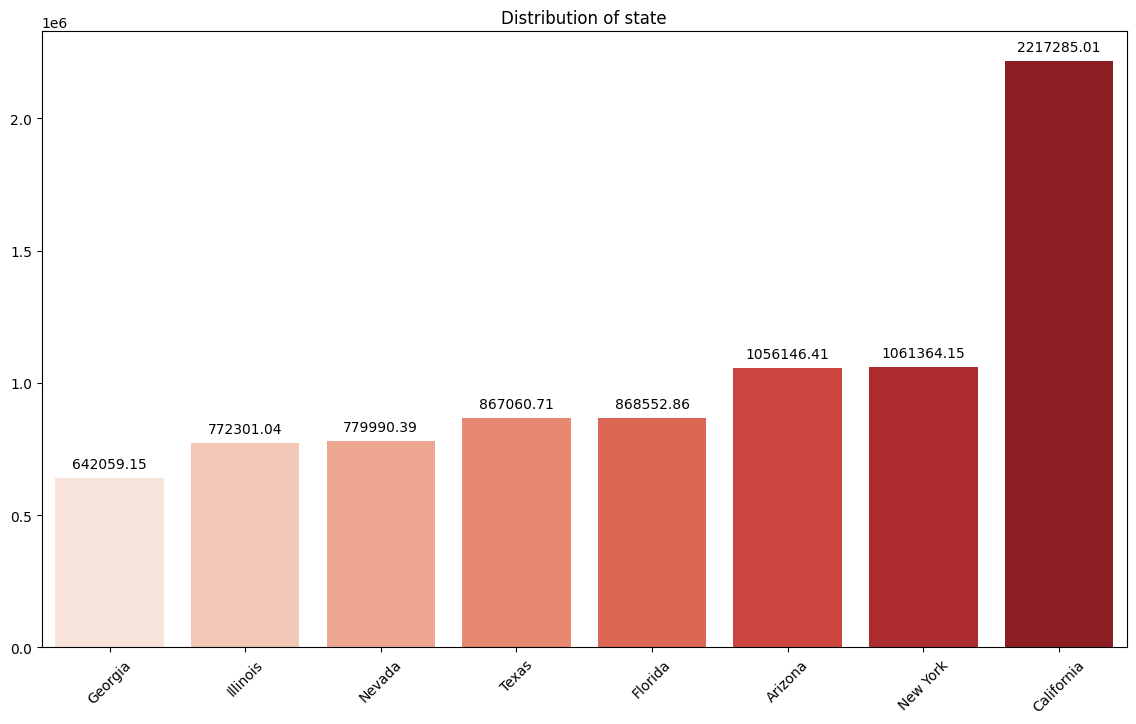

In [27]:
state_by_price = train_set.groupby('state')['price'].mean().sort_values().index.tolist()

dpf.plot_bar_with_values(
    train_set, 
    cat_cols = ['state'],
    num_col = 'price', 
    order_func = state_by_price,
    palette = 'Reds'
)

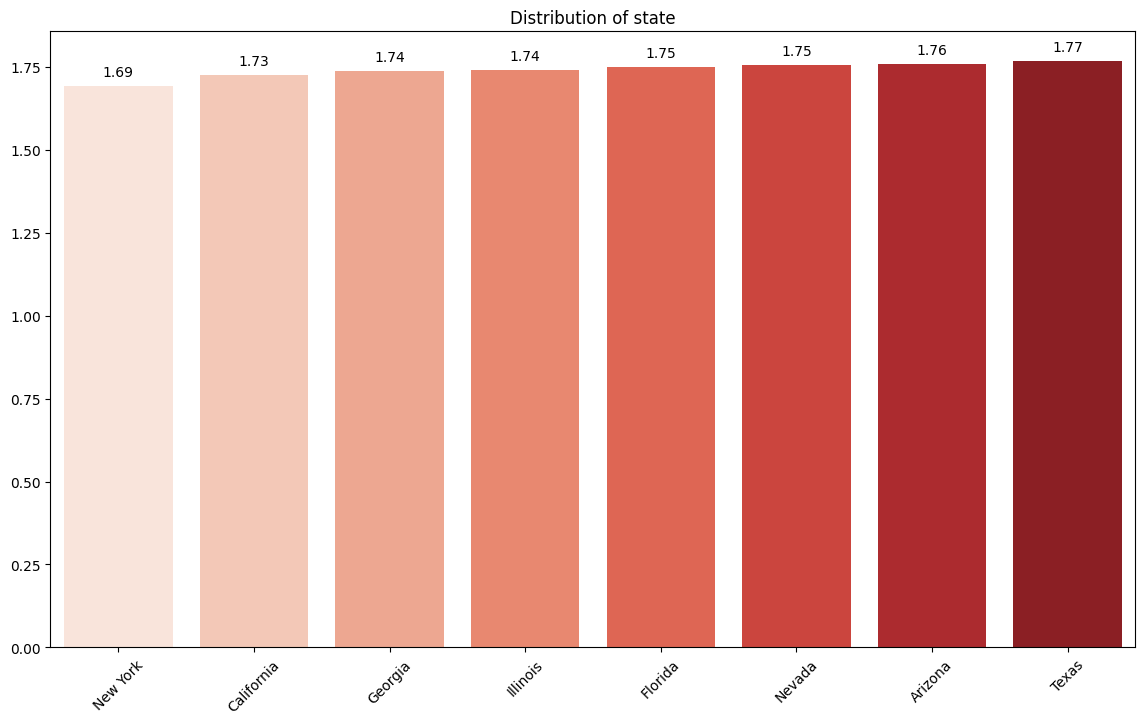

In [28]:
state_by_tax_rate = train_set.groupby('state')['tax_rate'].mean().sort_values().index.tolist()

dpf.plot_bar_with_values(
    train_set, 
    cat_cols = ['state'],
    num_col = 'tax_rate', 
    order_func = state_by_tax_rate,
    palette = 'Reds'
)

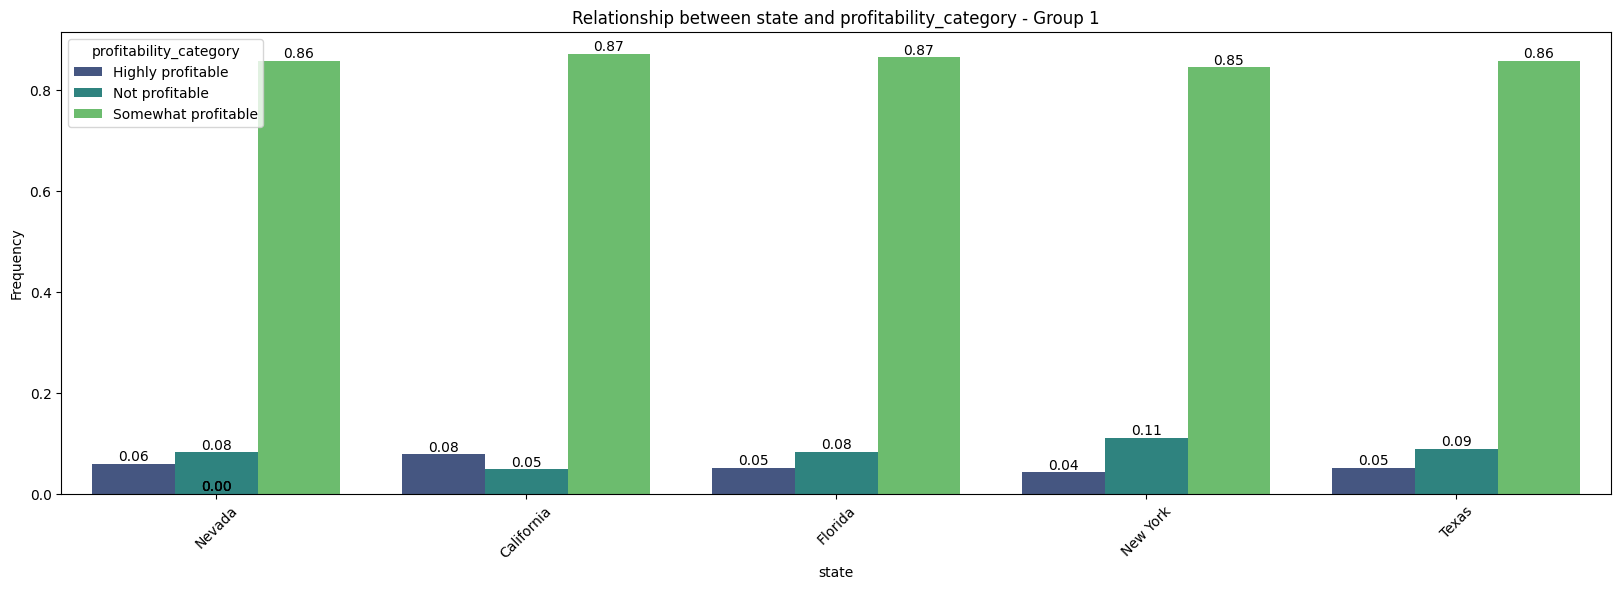

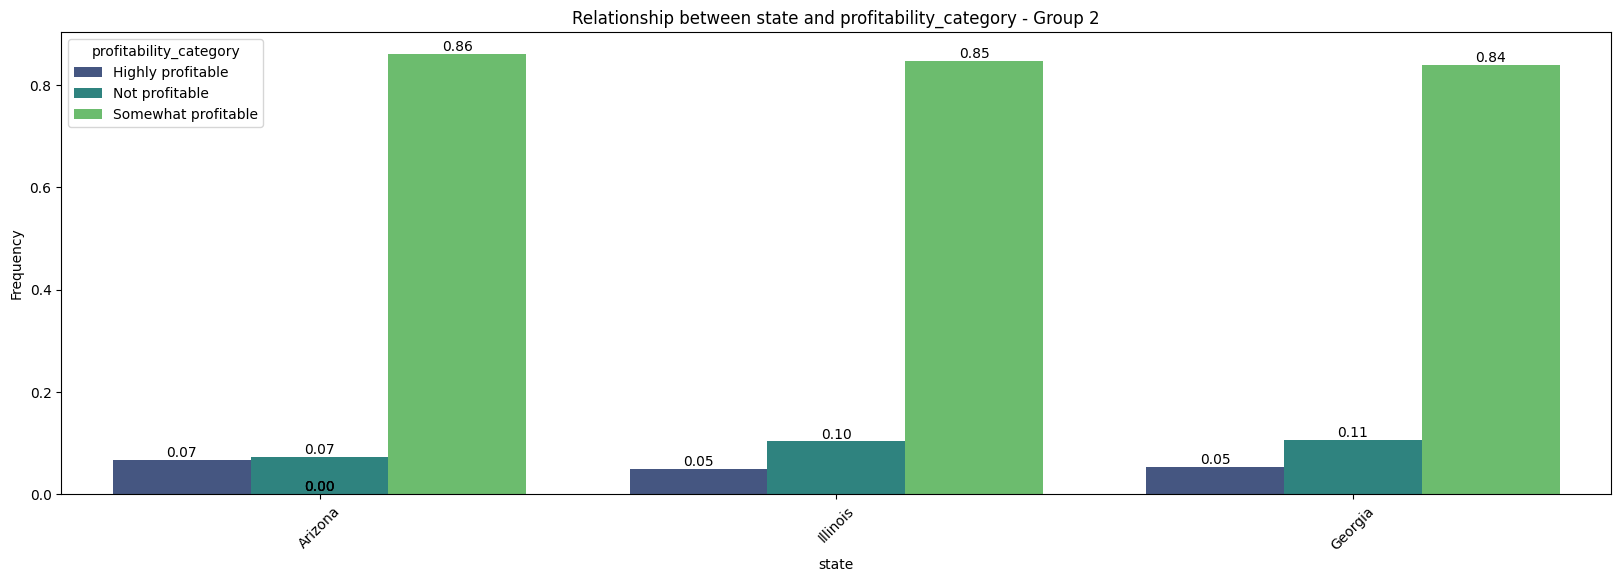

In [29]:
dpf.plot_categorical_relationship_fin(train_set, "state", "profitability_category", show_values = True, relative_freq = True)

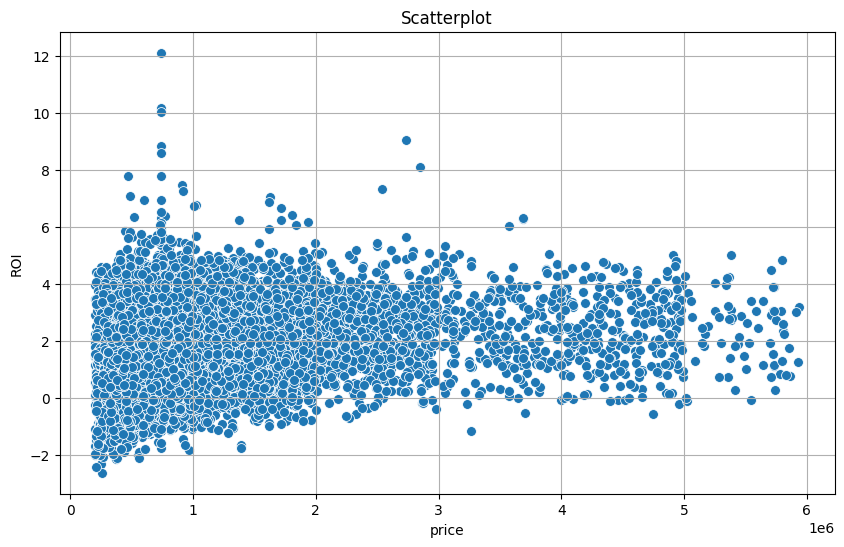

In [30]:
dpf.scatterplot_with_correlation(train_set, column_x = train_set["price"], column_y = train_set["ROI"])

- **`ROI vs Price`**: *Negative relationship. More expensive properties tend to have lower ROI. Cheaper properties show greater variability in ROI.*

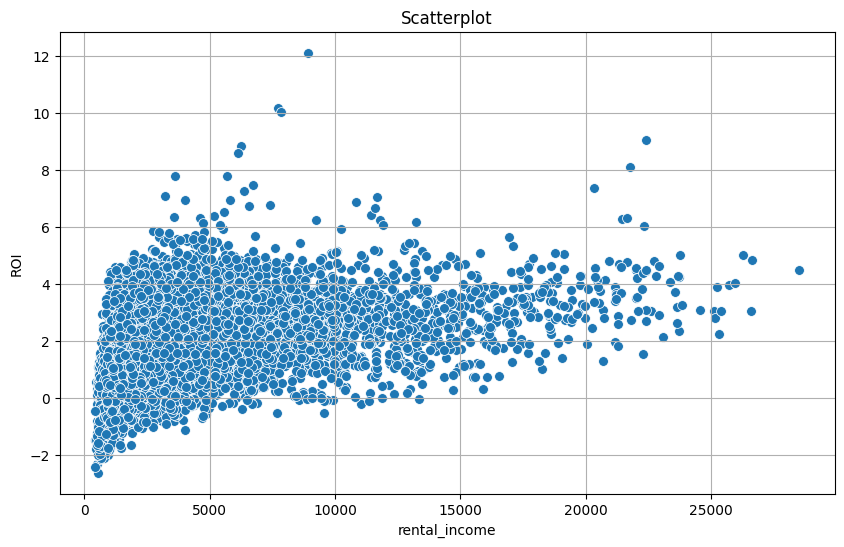

In [31]:
dpf.scatterplot_with_correlation(train_set, column_x = train_set["rental_income"], column_y = train_set["ROI"])

- **`ROI vs Rental income`**: *Positive relationship: higher rental income is associated with higher ROI.*

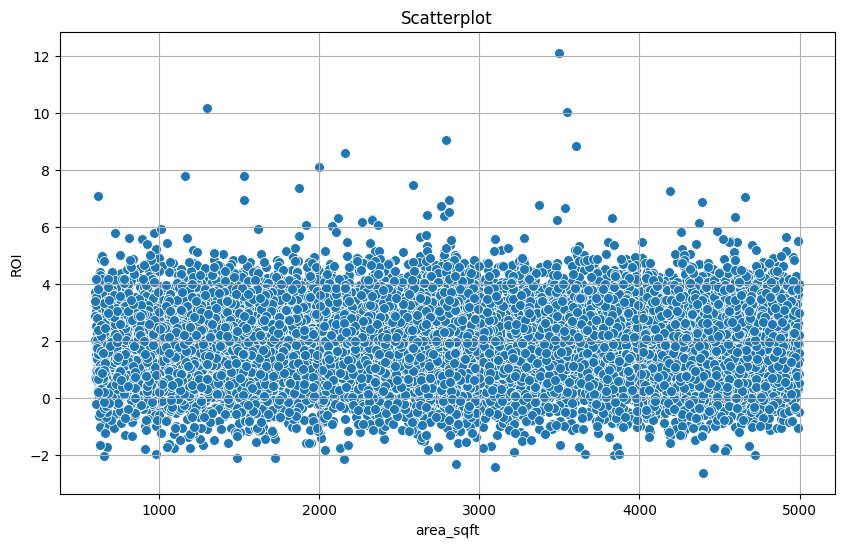

In [32]:
dpf.scatterplot_with_correlation(train_set, column_x = train_set["area_sqft"], column_y = train_set["ROI"])

- **`ROI vs Area`**: *The size of the area does not seem to have a direct impact on ROI.*

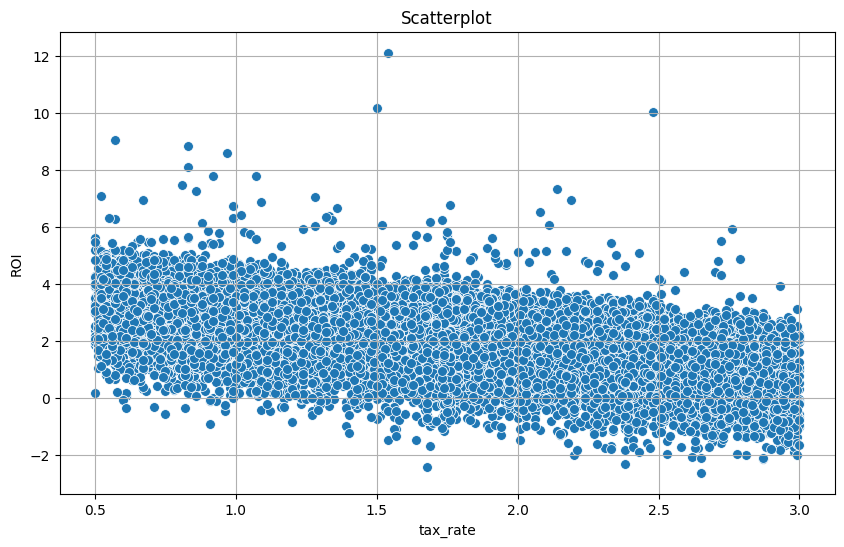

In [33]:
dpf.scatterplot_with_correlation(train_set, column_x = train_set["tax_rate"], column_y = train_set["ROI"])

- **`ROI vs Taxes`**: *Negative relationship. Higher tax rates tend to reduce ROI.*

In [34]:
corr = train_set.corr(numeric_only = True)
np.abs(corr['ROI']).sort_values(ascending = False)

ROI                  1.000000
tax_rate             0.513272
rental_income        0.377300
price                0.167407
maintenance_cost     0.146440
bedrooms             0.016428
area_sqft            0.016347
lot_size_acres       0.011602
bathrooms            0.008102
walkability_score    0.004422
school_rating        0.002389
garage_parking       0.002261
year_built           0.000454
Name: ROI, dtype: float64

<Axes: >

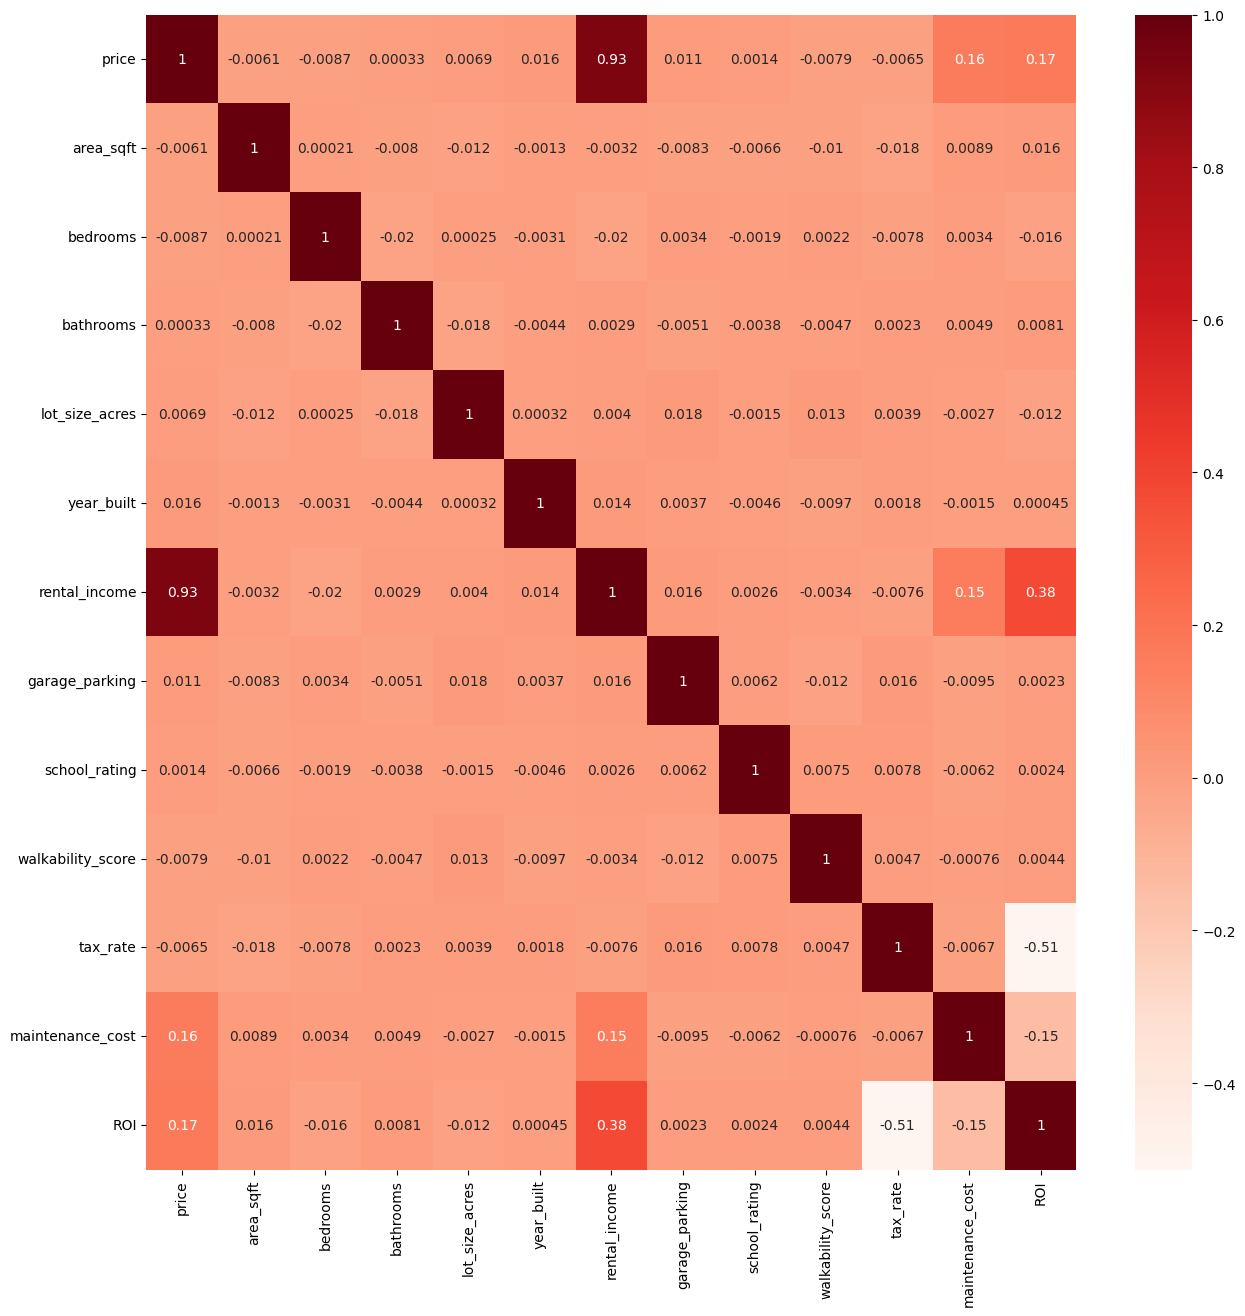

In [35]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = "Reds")

*We see that the features we are most interested in are `'price'`, `'rental_income'`, `'tax_rate'` and `'maitenance_cost'`, which makes a lot of sense, since they are the ones that are directly related mathematically.*

### 6. Feature engineering

#### 6.1. Feature selection

*I decide to `keep all the features`, since there are not many of them and they will not affect the speed of the model too much.*

*But it will be interesting to test by keeping only those features that meet `> 0.01`; so I will try both.*

In [36]:
r_min = 0.010
features_1 = corr['ROI'][(np.abs(corr['ROI']) > r_min)].index.to_list()

features_1

['price',
 'area_sqft',
 'bedrooms',
 'lot_size_acres',
 'rental_income',
 'tax_rate',
 'maintenance_cost',
 'ROI']

In [37]:
features_1.remove('ROI')
print(features_1)

['price', 'area_sqft', 'bedrooms', 'lot_size_acres', 'rental_income', 'tax_rate', 'maintenance_cost']


#### 6.2. Standardization

*To continue we should transform the categorical columns to numerical columns.*

*We will use the `DummyEncoding` method to convert each column in a numerical one.*

In [38]:
# Identify categorical columns
cat_cols = ["state", "city", "mainroad_access", "airconditioning", "preferred_area"]

# Apply One-Hot Encoding
train_set = pd.get_dummies(train_set, columns = cat_cols, drop_first = True, dtype = int)
test_set = pd.get_dummies(test_set, columns = cat_cols, drop_first = True, dtype = int)

# Ensure consistency between train and test
# If any column is missing in test_set_encoded, it is appended with zeroes
missing_cols = set(train_set.columns) - set(test_set.columns)
for col in missing_cols:
    test_set[col] = 0

# We make sure that the columns are in the same order
test_set = test_set[train_set.columns]

In [39]:
train_set

price  area_sqft  bedrooms  bathrooms  lot_size_acres  year_built  \
668     910963.0     1096.0       5.0        4.0            4.37        1969   
13149  1281433.0     4886.0       4.0        4.0            2.22        2021   
12508  5007318.0     2445.0       1.0        1.0            4.76        1964   
4015   1136251.0     4217.0       4.0        1.0            4.26        2021   
14185   444896.0     4374.0       4.0        4.0            2.05        1979   
...          ...        ...       ...        ...             ...         ...   
5191    321214.0     2165.0       1.0        1.0            1.00        1953   
13418   656391.0     1584.0       1.0        4.0            4.61        1982   
5390    939161.0     3416.0       2.0        2.0            3.20        1993   
860     301334.0     1486.0       2.0        4.0            1.14        1950   
7270    828043.0     3670.0       2.0        4.0            2.01        2006   

       rental_income  garage_parking  school_rating  walkability_score  ...  \
668      1998.000000             1.0            6.0                5.0  ...   
13149    5528.000000             3.0            6.0               70.0  ...   
12508   22789.000000             0.0            7.0                2.0  ...   
4015     2809.000000             3.0            2.0               80.0  ...   
14185    1779.000000             0.0            5.0               50.0  ...   
...              ...             ...            ...                ...  ...   
5191     1375.000000             2.0            1.0               59.0  ...   
13418    1435.000000             0.0            2.0               68.0  ...   
5390     3176.000000             1.0            2.0               38.0  ...   
860      1054.025415             3.0            4.0               81.0  ...   
7270     3693.000000             2.0            6.0               16.0  ...   

       city_San Diego  city_San Francisco  city_Savannah city_Scottsdale  \
668                 0                   0              0               0   
13149               0                   1              0               0   
12508               0                   1              0               0   
4015                0                   0              0               0   
14185               0                   0              0               0   
...               ...                 ...            ...             ...   
5191                0                   0              0               0   
13418               0                   0              0               0   
5390                0                   0              0               0   
860                 0                   0              0               0   
7270                0                   0              0               0   

       city_Springfield  city_Tampa  city_Tucson  mainroad_access_Yes  \
668                   0           0            0                    0   
13149                 0           0            0                    0   
12508                 0           0            0                    1   
4015                  0           0            0                    1   
14185                 0           0            0                    0   
...                 ...         ...          ...                  ...   
5191                  0           0            0                    0   
13418                 0           1            0                    0   
5390                  0           0            0                    1   
860                   0           0            0                    1   
7270                  0           0            0                    0   

       airconditioning_Yes  preferred_area_Yes  
668                      1                   1  
13149                    1                   1  
12508                    1                   1  
4015                     0                   0  
14185                    0                   0  
...              

#### 6.3. Features scaling

In [40]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [41]:
features_to_transform = ["price", "rental_income","maintenance_cost"]

In [42]:
for col in features_to_transform:
    desplaza = 0 
    if train_set_scaled[col].min() <= 0:
        desplaza = int(abs(train_set_scaled[col].min())) + 1
    train_set_scaled[col] = np.log(train_set_scaled[col] + desplaza)
    test_set_scaled[col] = np.log(test_set_scaled[col] + desplaza)

In [43]:
from sklearn.preprocessing import StandardScaler

# Adjust continuous columns in the dataset
continuous_columns = ['price', 'area_sqft', 'rental_income', 'school_rating', 
                      'walkability_score', 'tax_rate', 'maintenance_cost', 'year_built', 'lot_size_acres']

# Scale continuous columns
scaler = StandardScaler()
train_set_scaled[continuous_columns] = scaler.fit_transform(train_set_scaled[continuous_columns])
test_set_scaled[continuous_columns] = scaler.transform(test_set_scaled[continuous_columns])

train_set_scaled

price  area_sqft  bedrooms  bathrooms  lot_size_acres  year_built  \
668    0.181503  -1.399731       5.0        4.0        1.306406   -0.809401   
13149  0.695894   1.701190       4.0        4.0       -0.218316    1.672454   
12508  2.750437  -0.296000       1.0        1.0        1.582983   -1.048041   
4015   0.514631   1.153824       4.0        1.0        1.228397    1.672454   
14185 -0.898832   1.282279       4.0        4.0       -0.338875   -0.332121   
...         ...        ...       ...        ...             ...         ...   
5191  -1.389860  -0.525092       1.0        1.0       -1.083506   -1.573049   
13418 -0.312559  -1.000457       1.0        4.0        1.476607   -0.188937   
5390   0.227457   0.498458       2.0        2.0        0.476674    0.336070   
860   -1.486169  -1.080639       2.0        4.0       -0.984222   -1.716233   
7270   0.037635   0.706277       2.0        4.0       -0.367242    0.956534   

       rental_income  garage_parking  school_rating  walkability_score  ...  \
668        -0.441356             1.0       0.164784          -1.631268  ...   
13149       0.988628             3.0       0.164784           0.711169  ...   
12508       2.978945             0.0       0.525056          -1.739380  ...   
4015        0.037350             3.0      -1.276303           1.071544  ...   
14185      -0.604487             0.0      -0.195488          -0.009580  ...   
...              ...             ...            ...                ...  ...   
5191       -0.966448             2.0      -1.636574           0.314757  ...   
13418      -0.906433             0.0      -1.276303           0.639094  ...   
5390        0.209893             1.0      -1.276303          -0.442030  ...   
860        -1.339987             3.0      -0.555759           1.107582  ...   
7270        0.421812             2.0       0.164784          -1.234855  ...   

       city_San Diego  city_San Francisco  city_Savannah city_Scottsdale  \
668                 0                   0              0               0   
13149               0                   1              0               0   
12508               0                   1              0               0   
4015                0                   0              0               0   
14185               0                   0              0               0   
...               ...                 ...            ...             ...   
5191                0                   0              0               0   
13418               0                   0              0               0   
5390                0                   0              0               0   
860                 0                   0              0               0   
7270                0                   0              0               0   

       city_Springfield  city_Tampa  city_Tucson  mainroad_access_Yes  \
668                   0           0            0                    0   
13149                 0           0            0                    0   
12508                 0           0            0                    1   
4015                  0           0            0                    1   
14185                 0           0            0                    0   
...                 ...         ...          ...                  ...   
5191                  0           0            0                    0   
13418                 0           1            0                    0   
5390                  0           0            0                    1   
860                   0           0            0                    1   
7270                  0           0            0                    0   

       airconditioning_Yes  preferred_area_Yes  
668                      1                   1  
13149                    1                   1  
12508                    1                   1  
4015                     0                   0  
14185                    0                   0  
...                    ...  

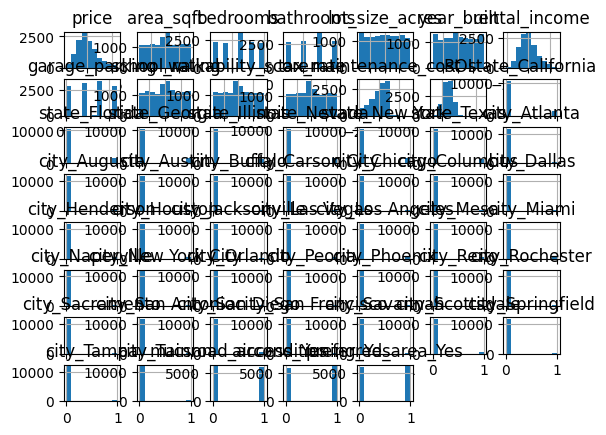

In [44]:
train_set_scaled.hist()
plt.tight_layout()

### 7. Machine Learning modeling

*To train the model, we will eliminate the column 'ROI', because surely when we get a new property we will not have it, but we want the model to calculate it and then classify it.*

In [45]:
target = 'profitability_category'
features = train_set.columns.drop([target, 'ROI'])

# Separate features and target
X_train = train_set_scaled[features]
y_train = train_set_scaled[target]

X_test = test_set_scaled[features]
y_test = test_set_scaled[target]


X_train_clf_dict = {}
X_test_clf_dict = {}


# X_train sets clasification

features_set_name = ["some_features", "every_feature"]
features_set = [features_1, features]

for set_name, feature_list in zip(features_set_name, features_set):
    print(feature_list)
    X_train_clf_dict[set_name] = train_set_scaled[feature_list]
    X_test_clf_dict[set_name] = test_set_scaled[feature_list]

['price', 'area_sqft', 'bedrooms', 'lot_size_acres', 'rental_income', 'tax_rate', 'maintenance_cost']
Index(['price', 'area_sqft', 'bedrooms', 'bathrooms', 'lot_size_acres',
       'year_built', 'rental_income', 'garage_parking', 'school_rating',
       'walkability_score', 'tax_rate', 'maintenance_cost', 'state_California',
       'state_Florida', 'state_Georgia', 'state_Illinois', 'state_Nevada',
       'state_New York', 'state_Texas', 'city_Atlanta', 'city_Augusta',
       'city_Austin', 'city_Buffalo', 'city_Carson City', 'city_Chicago',
       'city_Columbus', 'city_Dallas', 'city_Henderson', 'city_Houston',
       'city_Jacksonville', 'city_Las Vegas', 'city_Los Angeles', 'city_Mesa',
       'city_Miami', 'city_Naperville', 'city_New York City', 'city_Orlando',
       'city_Peoria', 'city_Phoenix', 'city_Reno', 'city_Rochester',
       'city_Sacramento', 'city_San Antonio', 'city_San Diego',
       'city_San Francisco', 'city_Savannah', 'city_Scottsdale',
       'city_Springfield

In [46]:
# First of all we must encode the target numerically for the xgboost model to work

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Instantiate models
knn_5_clf = KNeighborsClassifier(n_neighbors = 5)
knn_10_clf = KNeighborsClassifier(n_neighbors = 10)
lr_clf = LogisticRegression(max_iter = 1000)
rf_clf = RandomForestClassifier(max_depth = 10, random_state = 42)
xgb_clf = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth = 10, random_state = 42, verbose = -100)

modelos_clf = {
    "KNN_5": knn_5_clf,
    "KNN_10": knn_10_clf,
    "Logistic Regression": lr_clf,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf,
    "LightGBM": lgb_clf
}

*As data is quite unbalanced, we'll use `balanced_accuracy` (considers the performance of each class equally).*

In [48]:
from sklearn.model_selection import cross_val_score

for feature_set, X_train in X_train_clf_dict.items():
    print(f"For the set {feature_set}:")
    for tipo, modelo in modelos_clf.items():
        print(f"{tipo}: ", end = " ")
        print(np.mean(cross_val_score(modelo, X_train, y_train_encoded, cv = 5, scoring = "balanced_accuracy")))
    print("******")

For the set some_features:
KNN_5:  0.4985472779894929
KNN_10:  0.47472482943106015
Logistic Regression:  0.8804748221777585
Random Forest:  0.536721115743755
XGBoost:  0.8539516768718997
LightGBM:  0.8500178921520029
******
For the set every_feature:
KNN_5:  0.37991394299991066
KNN_10:  0.37218698752981133
Logistic Regression:  0.8760763553429121
Random Forest:  0.3889760314220696
XGBoost:  0.8342016286281362
LightGBM:  0.841282383359957
******


*The results look not pretty good a priori, so let's implement class_weight to see what happens.*

In [49]:
# Instanciamos modelos
knn_5_clf_2 = KNeighborsClassifier(n_neighbors = 5, weights= "distance")
knn_10_clf_2 = KNeighborsClassifier(n_neighbors= 10, weights = "distance")
lr_clf_2 = LogisticRegression(max_iter = 1000, class_weight = "balanced")
rf_clf_2 = RandomForestClassifier(max_depth = 10, random_state = 42, class_weight = "balanced")
xgb_clf_2 = XGBClassifier(max_depth = 5, random_state = 42, scale_pos_weight = len(train_set[train_set[target] == 0])/len(train_set[target] == 1))
lgb_clf_2 = LGBMClassifier(max_depth = 10, random_state = 42, verbose = -100, class_weight = "balanced")

modelos_clf_2 = {
    "KNN_5": knn_5_clf_2,
    "KNN_10": knn_10_clf_2,
    "Logistic Regression": lr_clf_2,
    "Random Forest": rf_clf_2,
    "XGBoost": xgb_clf_2,
    "LightGBM": lgb_clf_2
}

In [50]:
for feature_set, X_train in X_train_clf_dict.items():
    print(f"For the set {feature_set}:")
    for tipo, modelo in modelos_clf_2.items():
        print(f"{tipo}: ", end = " ")
        print(np.mean(cross_val_score(modelo, X_train, y_train_encoded, cv = 5, scoring = "balanced_accuracy")))
    print("******")

For the set some_features:
KNN_5:  0.5072628164694808
KNN_10:  0.46011130011824974
Logistic Regression:  0.9522831006815771
Random Forest:  0.8161849613573505
XGBoost:  0.8539516768718997
LightGBM:  0.9300489485347809
******
For the set every_feature:
KNN_5:  0.3800106080554931
KNN_10:  0.3628552088857539
Logistic Regression:  0.9571576875344532
Random Forest:  0.7673920261764288
XGBoost:  0.8342016286281362
LightGBM:  0.9238160506665535
******


*Results have improved significantly.*

**Remarks:**

1. `KNN`: *It performs very poorly on both feature sets, with **worse results on every_feature**.*

2. `Logistic Regression`: *Performs outstandingly well with both sets (≈0.95-0.96), being slightly **better in every_feature**.*

3. `Random Forest and LightGBM`: *Both models perform **better with some_features** than with every_feature.*
*In particular, LightGBM has a drop in performance with every_feature.*

4. `XGBoost`: *Consistently solid, with balanced accuracy of 0.85 on some_features and 0.83 on every_feature. It is **more robust than Random Forest** and is better at capturing complex relationships.*

#### **Decision: Choose `some_features`**

*Reason:*

- *Although Logistic Regression performs slightly better with every_feature, more advanced models such as Random Forest and LightGBM achieve better results with some_features.*   

- *In addition, a smaller set of features tends to be more tractable, reduce the risk of overfitting, and speed up training and prediction.*
- *Balanced accuracy with some_features is high enough for Logistic Regression (0.9523) and LightGBM (0.9300), suggesting that the selected features are sufficiently informative.*

**Conclusion**: *I would go with some_features for the balance between `simplicity`, overall `performance of advanced models` and `noise reduction` in the data.*

#### **Choice of Model: `Logistic Regression`**

*Reasons:*

- *`Performance`: In both feature sets, Logistic Regression has the highest balanced accuracy (0.9523 on some_features and 0.9572 on every_feature). It outperforms more complex models such as Random Forest and LightGBM, especially in terms of consistency.*   

- *`Robustness and Generalization`: Logistic Regression is a linear model that tends to generalize better when the features are relevant and the dataset size is not extremely large. It is less prone to overfitting compared to more complex models such as Random Forest or LightGBM, especially with smaller or medium-sized datasets.*

- *`Interpretability`: Logistic Regression provides coefficients that indicate the relative importance of each feature, which is valuable for understanding the impact of variables on the prediction. This can be especially useful if the project requires explaining the results to non-technical stakeholders.*

- *`Computational Efficiency`: Logistic Regression is faster to train and predict than more advanced models such as Random Forest or LightGBM, which is advantageous for fast iterations.*

#### **Conclusion:**

*`Logistic Regression` is the optimal choice because of its high performance, generalizability, efficiency, and ease of interpretation. In addition, it works exceptionally well with the `some_features` feature set, which is also more compact and manageable.*

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Use the set some_features
X_train_some = X_train_clf_dict["some_features"]  # Training features
X_test_some = X_test_clf_dict["some_features"]    # Test features

In [52]:
# Create final scaler

final_scaler = StandardScaler()
train_set_scaled[features_1] = final_scaler.fit_transform(train_set_scaled[features_1])
test_set_scaled[features_1] = final_scaler.transform(test_set_scaled[features_1])

train_set_scaled

price  area_sqft  bedrooms  bathrooms  lot_size_acres  year_built  \
668    0.181503  -1.399731  1.476680        4.0        1.306406   -0.809401   
13149  0.695894   1.701190  0.742682        4.0       -0.218316    1.672454   
12508  2.750437  -0.296000 -1.459311        1.0        1.582983   -1.048041   
4015   0.514631   1.153824  0.742682        1.0        1.228397    1.672454   
14185 -0.898832   1.282279  0.742682        4.0       -0.338875   -0.332121   
...         ...        ...       ...        ...             ...         ...   
5191  -1.389860  -0.525092 -1.459311        1.0       -1.083506   -1.573049   
13418 -0.312559  -1.000457 -1.459311        4.0        1.476607   -0.188937   
5390   0.227457   0.498458 -0.725313        2.0        0.476674    0.336070   
860   -1.486169  -1.080639 -0.725313        4.0       -0.984222   -1.716233   
7270   0.037635   0.706277 -0.725313        4.0       -0.367242    0.956534   

       rental_income  garage_parking  school_rating  walkability_score  ...  \
668        -0.441356             1.0       0.164784          -1.631268  ...   
13149       0.988628             3.0       0.164784           0.711169  ...   
12508       2.978945             0.0       0.525056          -1.739380  ...   
4015        0.037350             3.0      -1.276303           1.071544  ...   
14185      -0.604487             0.0      -0.195488          -0.009580  ...   
...              ...             ...            ...                ...  ...   
5191       -0.966448             2.0      -1.636574           0.314757  ...   
13418      -0.906433             0.0      -1.276303           0.639094  ...   
5390        0.209893             1.0      -1.276303          -0.442030  ...   
860        -1.339987             3.0      -0.555759           1.107582  ...   
7270        0.421812             2.0       0.164784          -1.234855  ...   

       city_San Diego  city_San Francisco  city_Savannah city_Scottsdale  \
668                 0                   0              0               0   
13149               0                   1              0               0   
12508               0                   1              0               0   
4015                0                   0              0               0   
14185               0                   0              0               0   
...               ...                 ...            ...             ...   
5191                0                   0              0               0   
13418               0                   0              0               0   
5390                0                   0              0               0   
860                 0                   0              0               0   
7270                0                   0              0               0   

       city_Springfield  city_Tampa  city_Tucson  mainroad_access_Yes  \
668                   0           0            0                    0   
13149                 0           0            0                    0   
12508                 0           0            0                    1   
4015                  0           0            0                    1   
14185                 0           0            0                    0   
...                 ...         ...          ...                  ...   
5191                  0           0            0                    0   
13418                 0           1            0                    0   
5390                  0           0            0                    1   
860                   0           0            0                    1   
7270                  0           0            0                    0   

       airconditioning_Yes  preferred_area_Yes  
668                      1                   1  
13149                    1                   1  
12508                    1                   1  
4015                     0                   0  
14185                    0                   0  
...                    ...  

In [53]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 1000)

lr_clf.fit(X_train_some, y_train)

LogisticRegression(max_iter=1000)

### 8. Train evaluation

In [54]:
def metrics_model(model, X, y_target):
    y_pred = model.predict(X)
    ConfusionMatrixDisplay.from_predictions(y_target, y_pred)
    print(classification_report(y_target, y_pred))

                     precision    recall  f1-score   support

  Highly profitable       0.94      0.82      0.88       690
     Not profitable       0.94      0.87      0.90      1051
Somewhat profitable       0.97      0.99      0.98     10345

           accuracy                           0.97     12086
          macro avg       0.95      0.89      0.92     12086
       weighted avg       0.97      0.97      0.97     12086



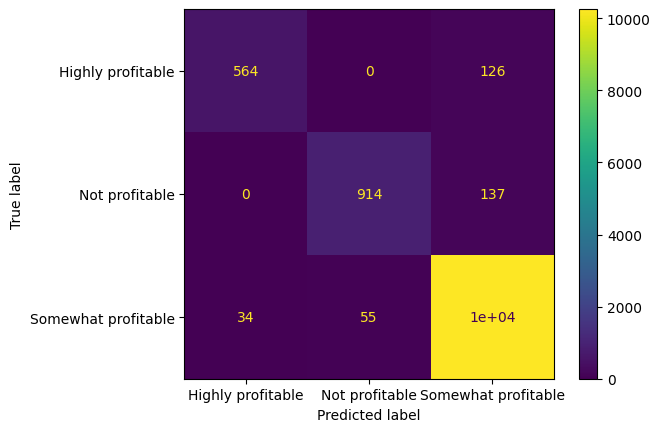

In [55]:
# Train metrics

metrics_model(lr_clf, X_train_some, y_train)

### 9. Test evaluation

                     precision    recall  f1-score   support

  Highly profitable       0.94      0.79      0.86       170
     Not profitable       0.92      0.86      0.89       263
Somewhat profitable       0.97      0.99      0.98      2589

           accuracy                           0.97      3022
          macro avg       0.95      0.88      0.91      3022
       weighted avg       0.97      0.97      0.97      3022



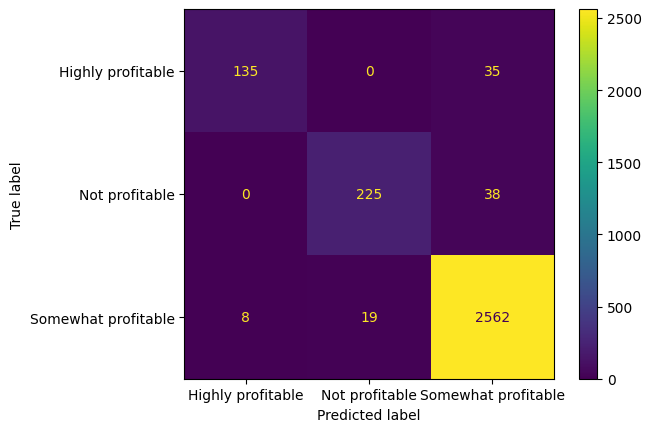

In [56]:
# Test metrics

metrics_model(lr_clf, X_test_some, y_test)

In [57]:
lr_clf.coef_

array([[-1.13527326e+01,  5.30228555e-03,  4.94202565e-03,
        -3.69473759e-02,  1.38365151e+01, -3.42751745e+00,
        -1.13351329e+00],
       [ 9.96866485e+00,  1.45136167e-02, -1.62109985e-02,
         2.54580597e-02, -1.28668357e+01,  3.70265668e+00,
         1.51967200e+00],
       [ 1.38406779e+00, -1.98159023e-02,  1.12689728e-02,
         1.14893162e-02, -9.69679467e-01, -2.75139233e-01,
        -3.86158714e-01]])

### 10. Model optimization

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid  = {                   
                "penalty": ["l1","l2"],
                "C": [0.1, 0.5, 1.0, 5.0, 10, 100],
                "max_iter": [50, 100, 500, 1000],
                "solver": ["liblinear"]
                }

grid_search = GridSearchCV(
    LogisticRegression(random_state = 42),
    param_grid,
    scoring = 'balanced_accuracy',
    cv = 5,
    verbose = 1
)

In [59]:
# GridSearch training
grid_search.fit(X_train_some, y_train)

# Best model found
best_model = grid_search.best_estimator_
print("\nBest hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best hyperparameters: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [60]:
def show_coefs(model, class_labels, figsize=(10, 5)): 
    # Obtener el número de submodelos
    number_of_submodels = model.coef_.shape[0]
    
    list_of_dfs = []
    for model_index in range(number_of_submodels):
        # DataFrame de coeficientes
        df_coef = pd.DataFrame(model.coef_[model_index], 
                               index=model.feature_names_in_, 
                               columns=["coefs"])

        # Configuración de gráficos
        fig, ax = plt.subplots(1, 2, figsize=figsize)
        df_coef.plot(kind="barh", ax=ax[0], legend=False)
        df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)

        # Título actualizado con etiquetas de clase
        class_label = class_labels[model_index]  # Obtener etiqueta de la clase
        fig.suptitle(f"Model Coefficients for {class_label}-vs-rest")

        fig.tight_layout()
        list_of_dfs.append(df_coef.copy())

    return list_of_dfs

In [61]:
print(best_model.classes_)

['Highly profitable' 'Not profitable' 'Somewhat profitable']


[                      coefs
 price            -47.933506
 area_sqft          0.006026
 bedrooms           0.063848
 lot_size_acres    -0.152165
 rental_income     54.923413
 tax_rate          -9.489552
 maintenance_cost  -2.362882,
                       coefs
 price             13.216305
 area_sqft          0.038203
 bedrooms          -0.040657
 lot_size_acres     0.024008
 rental_income    -18.032192
 tax_rate           5.861913
 maintenance_cost   2.765737,
                      coefs
 price            -0.593008
 area_sqft        -0.025578
 bedrooms          0.023408
 lot_size_acres    0.018859
 rental_income     0.859877
 tax_rate         -0.203984
 maintenance_cost -0.193454]

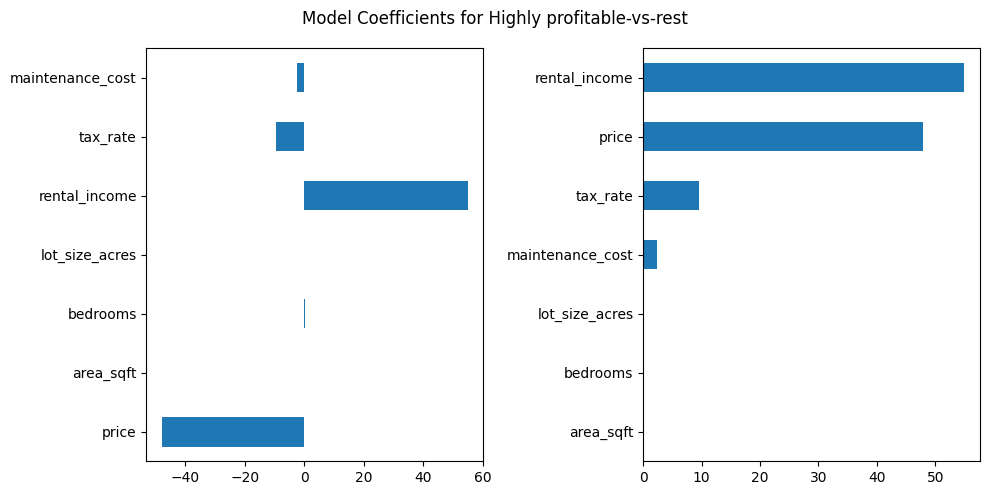

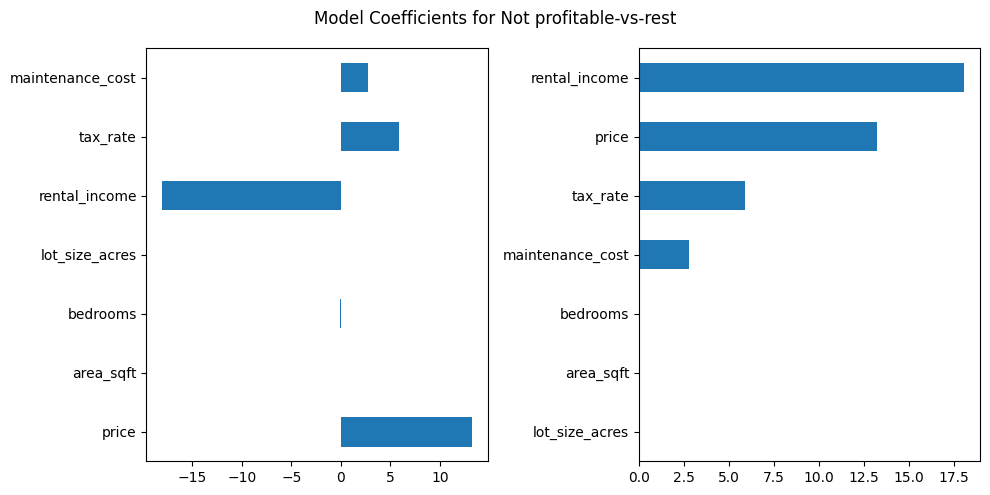

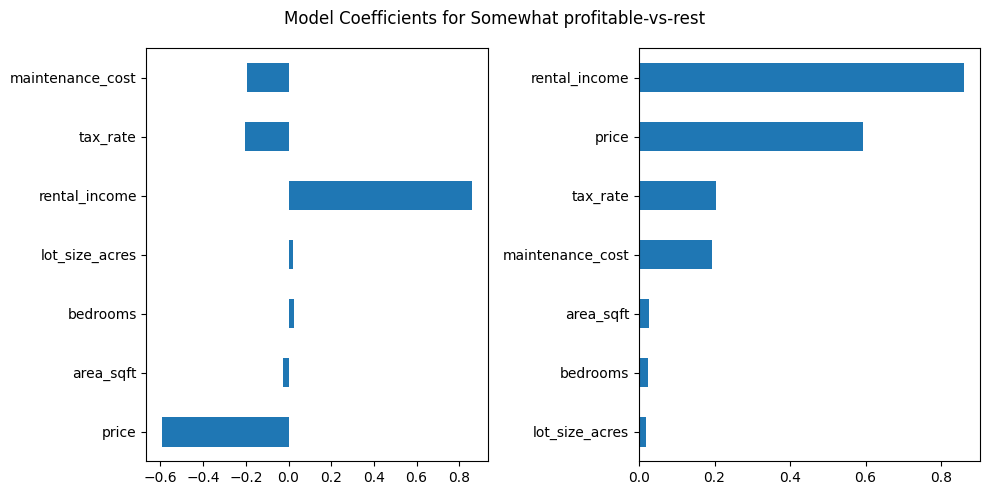

In [62]:
class_labels = ['Highly profitable', 'Not profitable', 'Somewhat profitable']
show_coefs(best_model, class_labels)

`FOR HIGHLY PROFITABLE PROPERTIES`

|FEATURE|COEFFICIENT|INTERPRETATION|
|---|---|---|
|**`price`**|*-47.93*|*A higher price significantly reduces the probability of being highly profitable*|
|**`area_sqft`**|*0.0060*|*A slightly larger area increases the probability*|
|**`bedrooms`**|*0.0638*|*More rooms have a positive effect, but it is minimal.*|
|**`lot_size_acres`**|*-0.1522*|*A larger plot size reduces the probability*|
|**`rental_income`**|*54.92*|*Higher rental income significantly increases the probability*|
|**`tax_rate`**|*-9.49*|*Higher taxes reduce the probability*|
|**`maintenance_cost`**|*-2.36*|*Higher maintenance costs reduce the likelihood*|

**Conclusion**:

- High rent (rental_income) is the biggest driver of profitability.   

- Lower price, smaller lot size, and low taxes favor “Highly profitable” classification.
- High maintenance costs penalize profitability.

### 11. Save the model

In [63]:
import pickle

with open('finished_model.model', "wb") as output_file:
    pickle.dump(best_model, output_file)

with open('final_scaler.pkl', 'wb') as output_scaler:
    pickle.dump(final_scaler, output_scaler)

In [64]:
# Model verification

with open('finished_model.model', 'rb') as file:
    loaded_model = pickle.load(file)

print("Loaded model:", loaded_model)

Loaded model: LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')


### 12. Model testing

In [65]:
def categorize_property(model, scaler, property_data):
    """
    Categorize a property using a trained model and a scaler.

    Parameters:
    - model: Trained machine learning model.
    - scaler: Scaler used during model training.
    - property_data: DataFrame containing property details.

    Returns:
    - A message summarizing the prediction and probabilities.
    """
    
    # Scale the property data
    scaled_property = scaler.transform(property_data)

    # Make predictions
    predicted_category = model.predict(scaled_property)[0]
    probabilities = model.predict_proba(scaled_property)[0]

    # Get the probability of the predicted category
    predicted_probability = probabilities[model.classes_.tolist().index(predicted_category)] * 100

    # Identify other categories and their probabilities
    categories = model.classes_.tolist()
    probabilities_dict = dict(zip(categories, probabilities * 100))

    # Build the output message
    if 35 <= predicted_probability <= 75:  # Check if the predicted probability is moderately confident
        other_probabilities = {k: v for k, v in probabilities_dict.items() if k != predicted_category}
        sorted_probabilities = sorted(other_probabilities.items(), key=lambda x: x[1], reverse=True)
        message = (
            f"Your property has been categorized as '{predicted_category}' with a probability of {predicted_probability:.2f}%.\n"
            "The probabilities for the other categories are:\n"
        )
        for other_category, other_probability in sorted_probabilities:
            message += f"  - '{other_category}': {other_probability:.2f}%\n"
    else:
        message = f"Your property has been categorized as '{predicted_category}' with a probability of {predicted_probability:.2f}%."

    return message


# Example 1: A highly profitable property
property_1 = pd.DataFrame([{
    'price': 100000,
    'area_sqft': 2000,
    'bedrooms': 2,
    'lot_size_acres': 0.25,
    'rental_income': 100000,
    'tax_rate': 1.0,
    'maintenance_cost': 1000
}])

# Example 2: A somewhat profitable property
property_2 = pd.DataFrame([{
    'price': 250000,
    'area_sqft': 1300,
    'bedrooms': 2,
    'lot_size_acres': 0.3,
    'rental_income': 50000,
    'tax_rate': 2.0,
    'maintenance_cost': 6000
}])

# Call the function for each property and display results
result_1 = categorize_property(loaded_model, final_scaler, property_1)
result_2 = categorize_property(loaded_model, final_scaler, property_2)

print("Example 1:\n", result_1)
print("\nExample 2:\n", result_2)


Example 1:
 Your property has been categorized as 'Highly profitable' with a probability of 50.00%.
The probabilities for the other categories are:
  - 'Somewhat profitable': 50.00%
  - 'Not profitable': 0.00%


Example 2:
 Your property has been categorized as 'Not profitable' with a probability of 100.00%.


### 13. General conclusions
1. **`Objective and Context`**:   

*The main objective of the project was to develop a classification model to determine the profitability of real estate properties based on key variables, categorizing them into three levels: `'Highly profitable'`, `'Somewhat profitable'` and `'Not profitable'`. This analysis seeks to provide a data-driven tool to optimize investment decisions and maximize return on investment (ROI).*

2. **`Methodology`**:

- **Data preparation**:

    - *Data were collected from multiple sources related to real estate characteristics such as price, land size, rental income, and associated costs.*   
    
    - *Data were preprocessed to ensure quality and consistency, including standardization and coding of necessary variables.*

- **Models used**:

    - *The main model was a **Multiclass Logistic Regression** using the one-versus-all technique to address classification.*   

    - *Hyperparameter adjustment was performed with `GridSearchCV` to maximize accuracy and minimize classification errors.*

- **Model evaluation**:

*The model achieved robust performance with high **balanced accuracy**, especially in the `'Highly profitable'` category.*
*Key metrics such as precision, recall and F1-score confirmed the robustness of the model.*   

3. **`Main findings`**:

    1. ***Most influential variables***:

        - *`rental_income` was consistently the most important variable in predicting profitability. High income significantly increased the probability of being `'Highly profitable'`.*   

        - *`price` (property price) had a strong, negative impact on profitability. High prices penalize the classification as profitable.*

        - *`tax_rate` and `maintenance_cost` (maintenance costs) are determinants in the classification:*

            - *High associated costs increase the likelihood of a property being `'Not profitable'`.*

    2. ***Physical characteristics have less relative impact***:

        - *Variables such as `lot size` and built-up area (`area_sqft`) showed less significant impact compared to financial variables.*

    3. ***Differences between categories***:

        - *`'Highly profitable'` properties are dominated by high income, low prices and efficient cost control.*   

        - *`'Not profitable'` properties are associated with high prices, low rental income, and high maintenance costs and taxes.*
        - *The `'Somewhat profitable'` category represents an intermediate balance, with less sensitivity to key variables.*

4. **`Project limitations`**:

- ***Data availability***: *Although the model performed well, the analysis could benefit from a larger dataset that includes geographic characteristics or macroeconomic data such as interest rates.*   

- ***Model assumptions***: *Logistic Regression assumes linear relationships between characteristics and the target variable, which may not fully capture complex interactions in real estate.*

- ***Possible biases***: *The dataset may be biased toward certain property characteristics or specific locations, which could limit the generalizability of the model.*

5. **`Practical applications`**:

- ***Investment decisions***: *The model allows identifying properties with high profitability potential based on key characteristics, facilitating acquisition strategies.*   

- ***Property optimization***: *Identifies specific factors that reduce profitability (e.g., high costs or disproportionate pricing), helping to prioritize property improvements.*

- ***Predictive analytics***: *With additional data, this approach can be extended to predict future trends in property profitability.*

6. **`Future views`**:
- ***Incorporation of new data***: *Include additional variables such as geographic location, proximity to services, and occupancy rates.*   

- ***Exploration of advanced models***: *Test more complex algorithms such as  neural networks to capture nonlinear relationships.*

- ***Temporal analysis***: *Introduce temporal analysis to predict how properties may change their ranking over time.*

#### **Final Summary**

*The project demonstrated that financial data such as rental income, price, and associated costs are critical factors in ranking the profitability of real estate properties. This model provides a solid foundation for strategic decisions in the industry, with room for improvement and expansion with richer data and advanced approaches.*